# Regressions
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
data = pd.read_csv("ML_ready_data.csv")

In [3]:
data.head()

Price  Number of bedrooms  Livable surface  Kitchen equipment  \
0  333500.0                 2.0            100.0                4.0   
1  379000.0                 1.0             80.0                4.0   
2  295000.0                 2.0             80.0                2.0   
3  635000.0                 2.0            217.0                4.0   
4  595000.0                 2.0            207.0                2.0   

   Number of bathrooms  Balcony  State of the property  \
0                  1.0      0.0                    2.0   
1                  1.0      0.0                    2.0   
2                  1.0      0.0                    2.0   
3                  1.0      0.0                    4.0   
4                  2.0      0.0                    4.0   

   Surface master bedroom  Surface of living-room  Cellar  ...  \
0                    13.0                    29.0     0.0  ...   
1                    21.0                    25.0     1.0  ...   
2                    10.0                    28.0     0.0  ...   
3                    25.0                    63.0     0.0  ...   
4                    16.0                    60.0     0.0  ...   

   Brussels-Capital Region  East Flanders Province  Flemish Brabant Province  \
0                        1                       0                         0   
1                        1                       0                         0   
2                        1                       0                         0   
3                        1                       0                         0   
4                        1                       0                         0   

   Hainaut Province  Limburg Province  Liège Province  Luxembourg Province  \
0                 0                 0               0                    0   
1                 0                 0               0                    0   
2                 0                 0               0                    0   
3                 0                 0               0                    0   
4                 0                 0               0                    0   

   Namur Province  Walloon Brabant Province  West Flanders Province  
0               0                         0                       0  
1               0                         0                       0  
2               0                         0                       0  
3               0                         0                       0  
4               0                         0                       0  

[5 rows x 40 columns]

In [4]:
data.shape

(17345, 40)

In [5]:
data = data.drop(data[data["Surface garden"] == 150000].index)
data = data.drop(data[data["Surface master bedroom"] >= 1000].index)
data = data.drop(data[data["Livable surface"] >= 10000].index)

<AxesSubplot:>

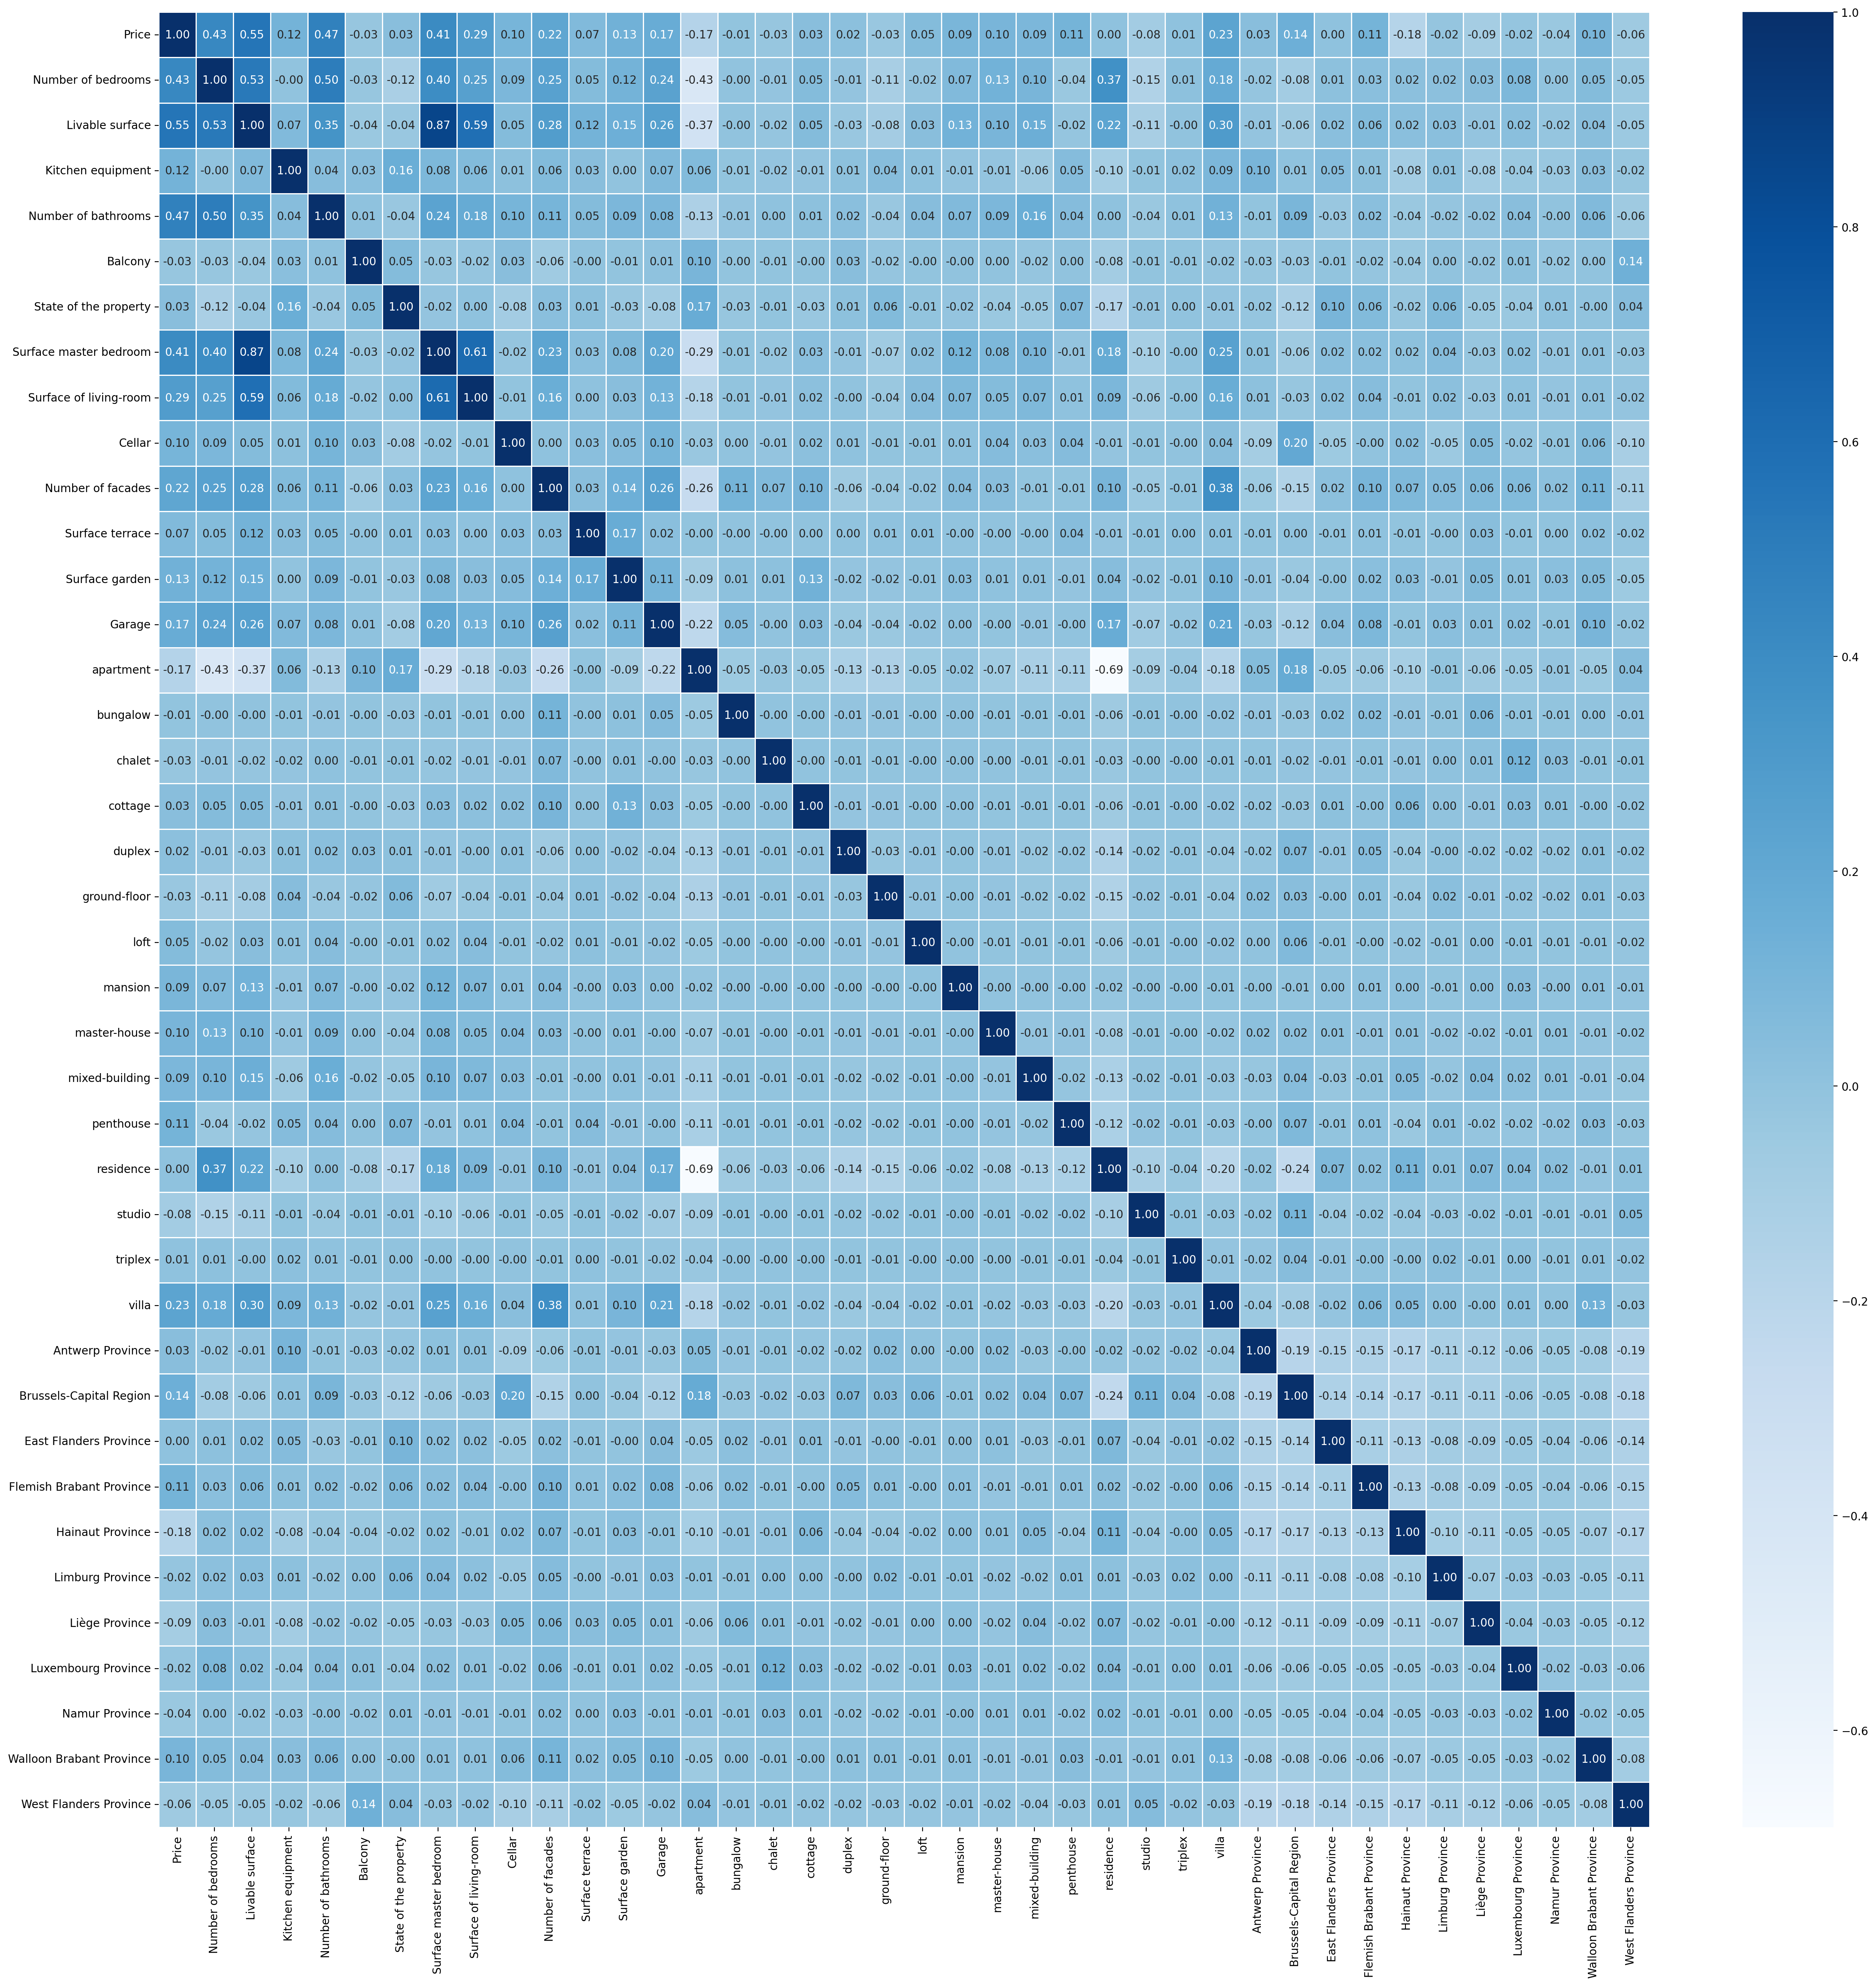

In [6]:
fig = plt.subplots(figsize=(30,30), dpi=200)

sns.heatmap(data.corr(), cmap='Blues', linewidth=0.5, annot=True, fmt=".2f")

---

### Standardization

**With MinMaxScaler**

In [7]:
df2 = data.values
scaler = MinMaxScaler()
df2_scaled = scaler.fit_transform(df2)
df2 = pd.DataFrame(df2_scaled)

In [8]:
df2.columns = data.columns
df2 = df2.drop("Surface master bedroom", axis=1)
df2.head()

Price  Number of bedrooms  Livable surface  Kitchen equipment  \
0  0.064134            0.045455         0.033011           1.000000   
1  0.072884            0.000000         0.026342           1.000000   
2  0.056731            0.045455         0.026342           0.333333   
3  0.122115            0.045455         0.072024           1.000000   
4  0.114423            0.045455         0.068690           0.333333   

   Number of bathrooms  Balcony  State of the property  \
0             0.000000      0.0                   0.25   
1             0.000000      0.0                   0.25   
2             0.000000      0.0                   0.25   
3             0.000000      0.0                   0.75   
4             0.076923      0.0                   0.75   

   Surface of living-room  Cellar  Number of facades  ...  \
0                0.006431     0.0            0.02381  ...   
1                0.005512     1.0            0.02381  ...   
2                0.006201     0.0            0.02381  ...   
3                0.014240     0.0            0.02381  ...   
4                0.013551     0.0            0.02381  ...   

   Brussels-Capital Region  East Flanders Province  Flemish Brabant Province  \
0                      1.0                     0.0                       0.0   
1                      1.0                     0.0                       0.0   
2                      1.0                     0.0                       0.0   
3                      1.0                     0.0                       0.0   
4                      1.0                     0.0                       0.0   

   Hainaut Province  Limburg Province  Liège Province  Luxembourg Province  \
0               0.0               0.0             0.0                  0.0   
1               0.0               0.0             0.0                  0.0   
2               0.0               0.0             0.0                  0.0   
3               0.0               0.0             0.0                  0.0   
4               0.0               0.0             0.0                  0.0   

   Namur Province  Walloon Brabant Province  West Flanders Province  
0             0.0                       0.0                     0.0  
1             0.0                       0.0                     0.0  
2             0.0                       0.0                     0.0  
3             0.0                       0.0                     0.0  
4             0.0                       0.0                     0.0  

[5 rows x 39 columns]

**With StandardScaler**

In [9]:
df3 = data.values
scaler = StandardScaler()
df3_scaled = scaler.fit_transform(df3)
df3 = pd.DataFrame(df3_scaled)
df3.columns = data.columns
df3.head()

Price  Number of bedrooms  Livable surface  Kitchen equipment  \
0 -0.050524           -0.550877        -0.481823           1.636401   
1  0.109843           -1.293549        -0.650969           1.636401   
2 -0.186219           -0.550877        -0.650969          -0.665595   
3  1.012127           -0.550877         0.507684           1.636401   
4  0.871145           -0.550877         0.423111          -0.665595   

   Number of bathrooms   Balcony  State of the property  \
0            -0.352604 -0.144796              -0.616861   
1            -0.352604 -0.144796              -0.616861   
2            -0.352604 -0.144796              -0.616861   
3            -0.352604 -0.144796               0.810706   
4             1.222441 -0.144796               0.810706   

   Surface master bedroom  Surface of living-room    Cellar  ...  \
0               -0.424493               -0.281310 -0.562694  ...   
1                0.094849               -0.366489  1.777164  ...   
2               -0.619246               -0.302605 -0.562694  ...   
3                0.354520                0.442711 -0.562694  ...   
4               -0.229740                0.378827 -0.562694  ...   

   Brussels-Capital Region  East Flanders Province  Flemish Brabant Province  \
0                 2.366786               -0.329087                 -0.335402   
1                 2.366786               -0.329087                 -0.335402   
2                 2.366786               -0.329087                 -0.335402   
3                 2.366786               -0.329087                 -0.335402   
4                 2.366786               -0.329087                 -0.335402   

   Hainaut Province  Limburg Province  Liège Province  Luxembourg Province  \
0         -0.393947         -0.248595       -0.270869            -0.137352   
1         -0.393947         -0.248595       -0.270869            -0.137352   
2         -0.393947         -0.248595       -0.270869            -0.137352   
3         -0.393947         -0.248595       -0.270869            -0.137352   
4         -0.393947         -0.248595       -0.270869            -0.137352   

   Namur Province  Walloon Brabant Province  West Flanders Province  
0       -0.119729                 -0.182705               -0.436458  
1       -0.119729                 -0.182705               -0.436458  
2       -0.119729                 -0.182705               -0.436458  
3       -0.119729                 -0.182705               -0.436458  
4       -0.119729                 -0.182705               -0.436458  

[5 rows x 40 columns]

---

## Linear Regressions

### *As is* Data

In [145]:
X = np.array(data.loc[:, "Number of bedrooms":])
y = np.array(data["Price"])

In [146]:
X.shape

(17336, 39)

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
reg = LinearRegression().fit(X_train, y_train)

In [149]:
print('Intercept:', reg.intercept_)
print('Coefficients:', reg.coef_)

Intercept: -78488.97786680103
Coefficients: [ 2.01020608e+04  1.31276848e+03  1.00523764e+04  1.04455537e+05
 -2.53524689e+04  1.20466713e+04 -3.15422095e+03 -6.12086131e+01
  9.55134257e+03  2.31046419e+04 -8.76244640e+01  1.70652961e+01
  5.13857476e+03 -2.94277402e+04 -6.63763861e+04 -1.23137064e+05
 -1.22818575e+04 -1.72713149e+04 -3.31910914e+04  3.78806443e+04
  2.57458741e+05  4.81173685e+04 -6.39072756e+04  1.55839615e+05
 -5.36318129e+04 -1.05897616e+05 -1.52059513e+04  2.10317404e+04
  4.29619319e+04  1.21634571e+05  8.49862720e+03  6.90757688e+04
 -1.17346301e+05 -2.01952952e+04 -7.36771088e+04 -7.38601350e+04
 -5.45955548e+04  8.26002605e+04  1.49032364e+04]


In [150]:
reg.score(X_train, y_train)

0.4896806406466695

In [151]:
y_pred = reg.predict(X_test)

In [152]:
data["Price"].mean()

347834.97277341946

In [153]:
mean_squared_error(y_test, y_pred)  # oops

33097610548.35648

In [154]:
mean_absolute_error(y_test, y_pred)

104537.21162456728

In [155]:
print(r2_score(y_test, y_pred))

0.5261565318237221


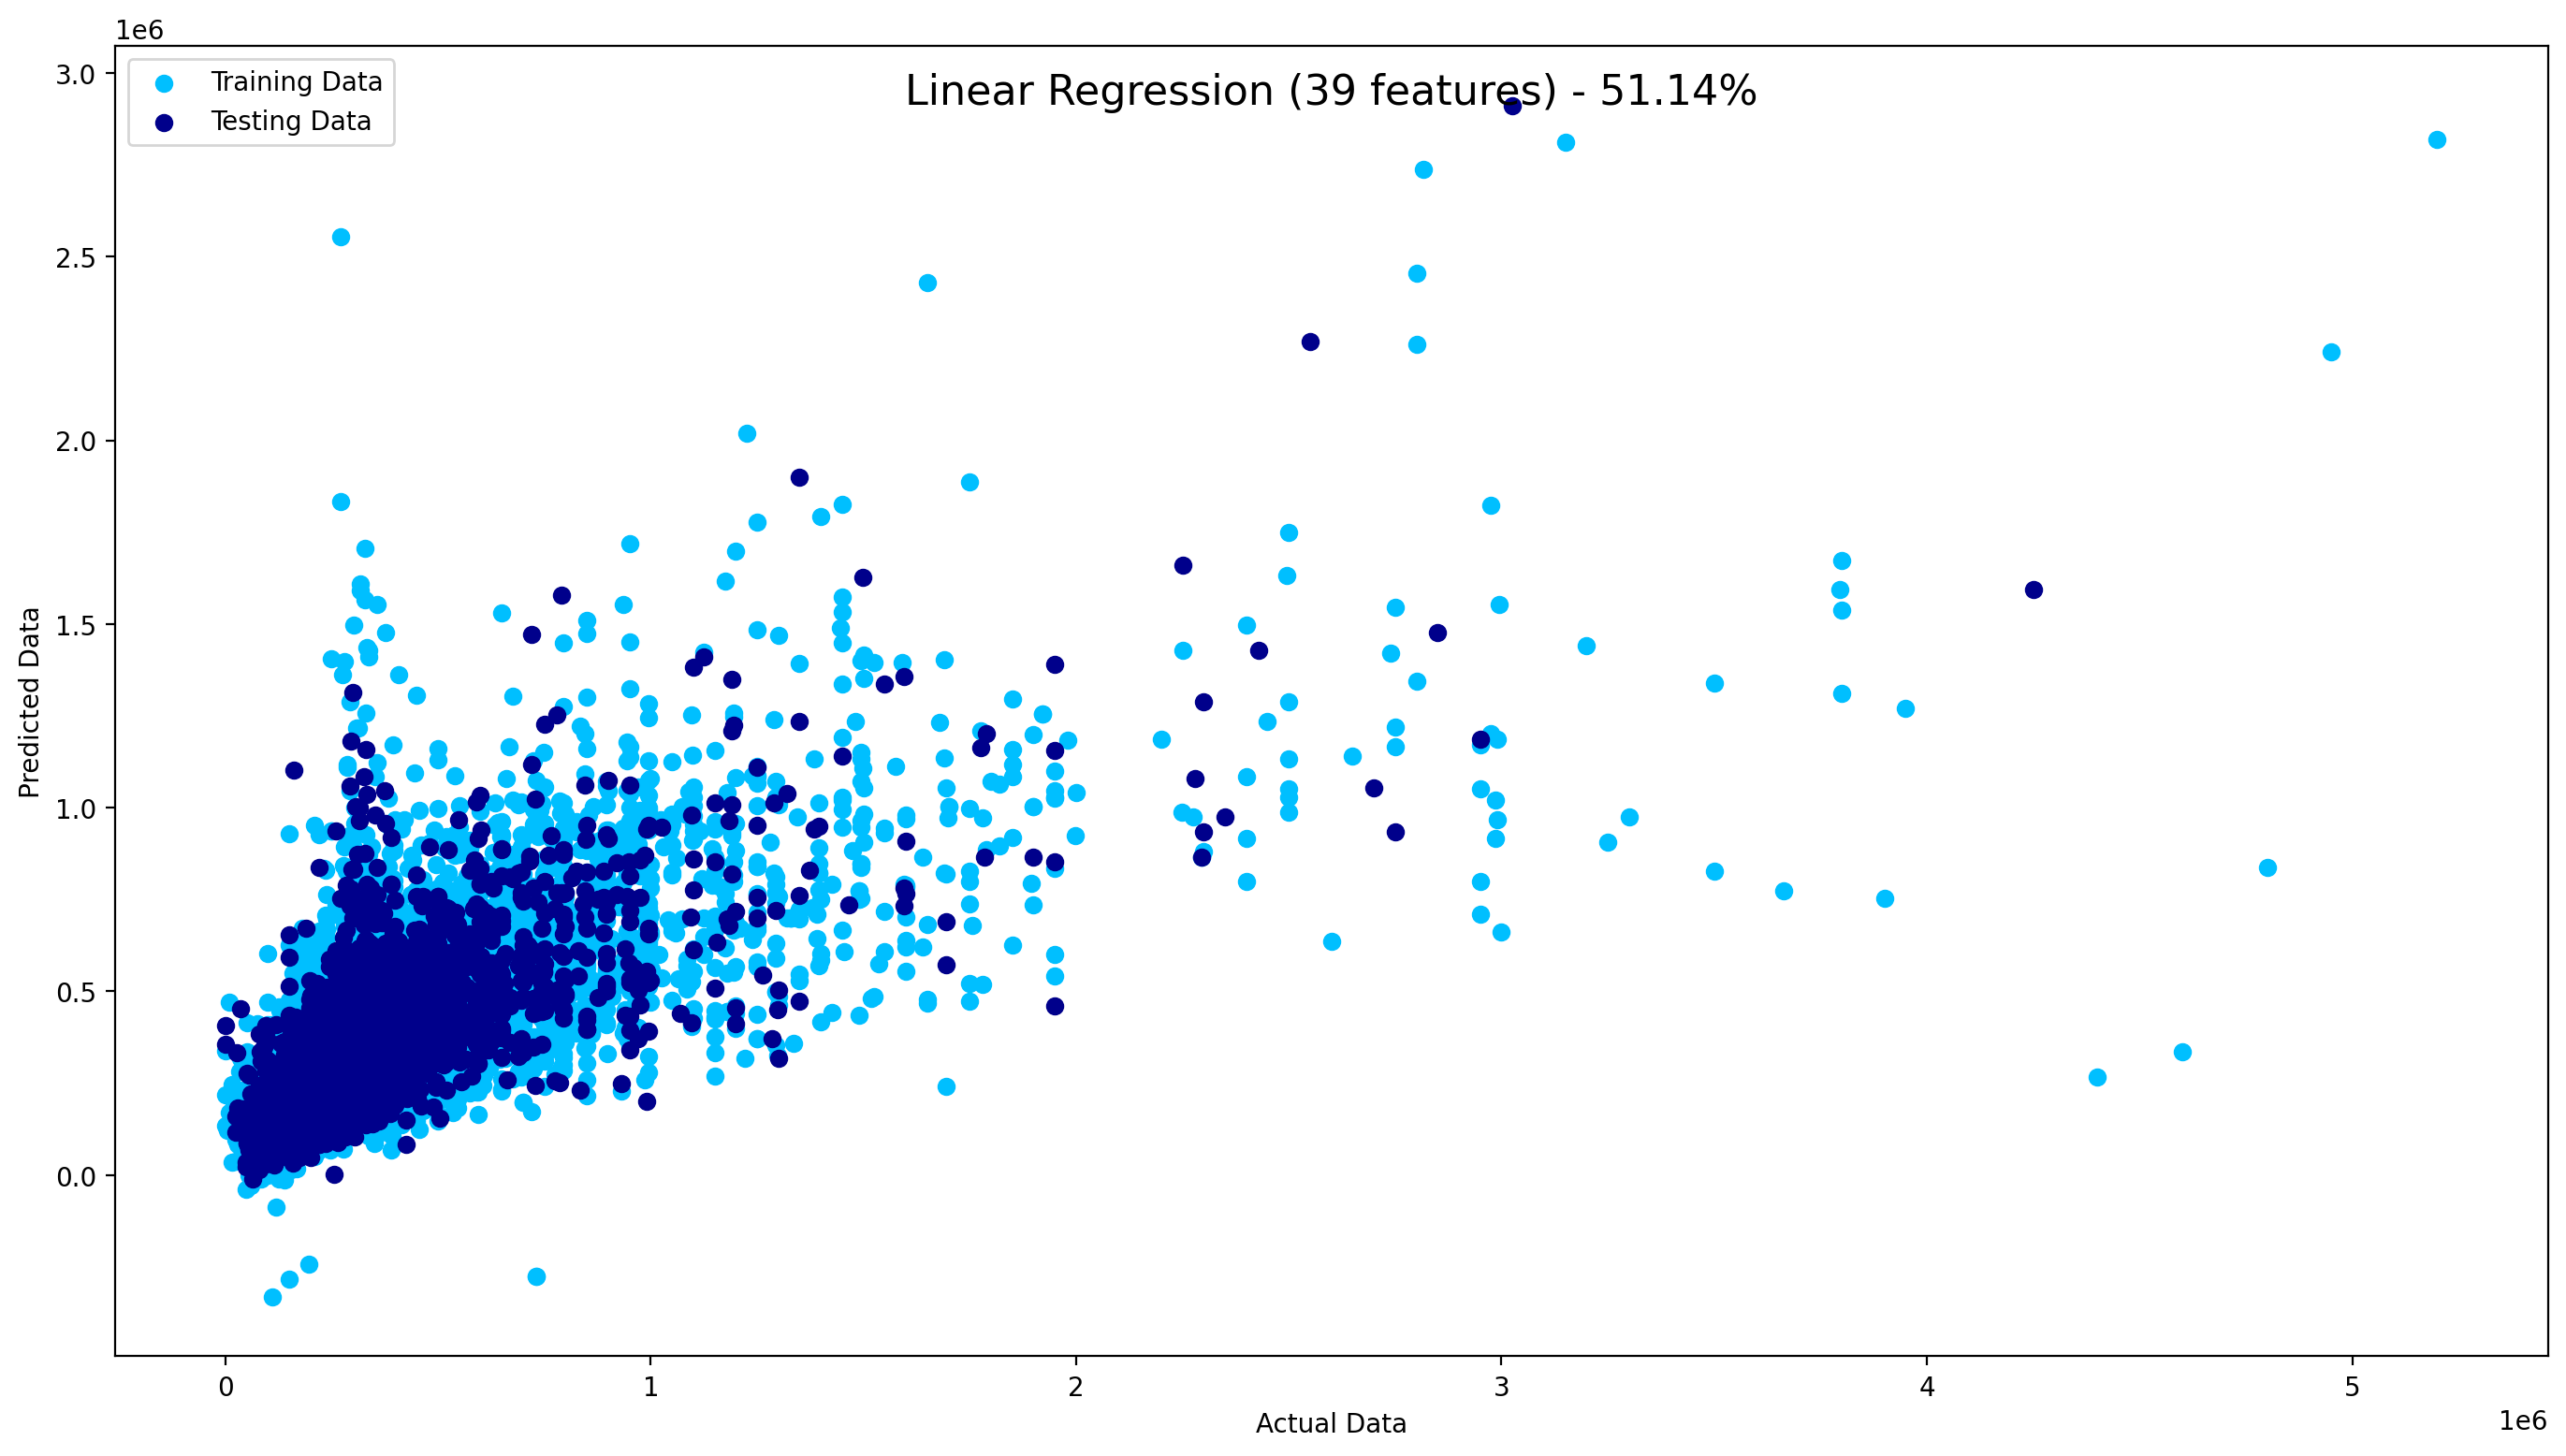

In [157]:
fig = plt.figure(figsize=(13,7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Linear Regression (39 features) - 51.14%", fontsize=16)


plt.scatter(y_train, reg.predict(X_train), color="deepskyblue", label="Training Data")
plt.scatter(y_test, reg.predict(X_test), color="darkblue", label="Testing Data")
axes.legend()
axes.set_xlabel("Actual Data")
axes.set_ylabel("Predicted Data")

plt.show()

In [87]:
test_residuals = y_test - y_pred

<Axes:xlabel='y_test (prices in millions)', ylabel='Residuals (in millions)'>

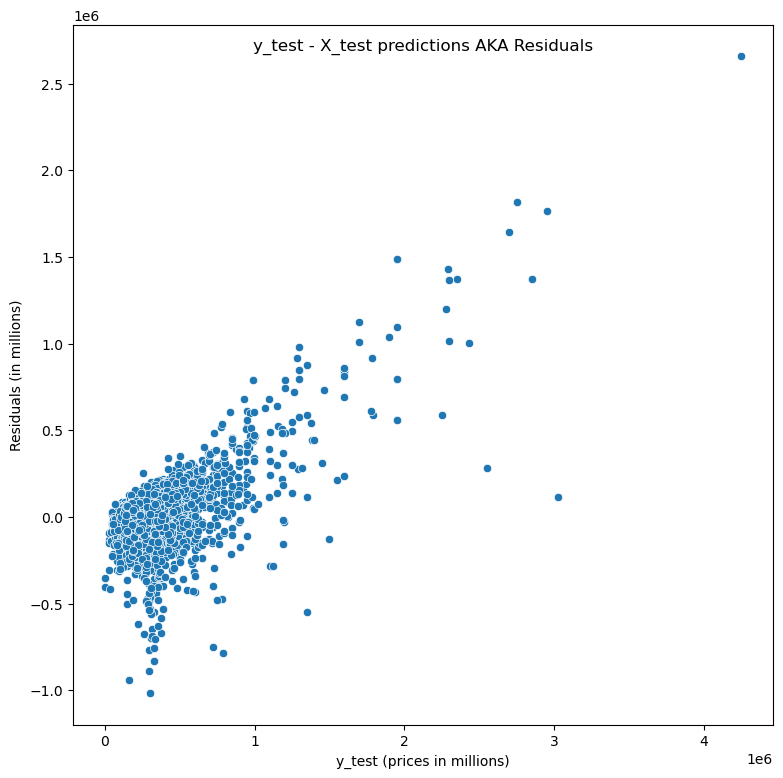

In [119]:
fig = plt.figure(figsize=(7,7), dpi=100)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("y_test - X_test predictions AKA Residuals")

axes.set_xlabel("y_test (prices in millions)")
axes.set_ylabel("Residuals (in millions)")

sns.scatterplot(x=y_test, y=test_residuals)

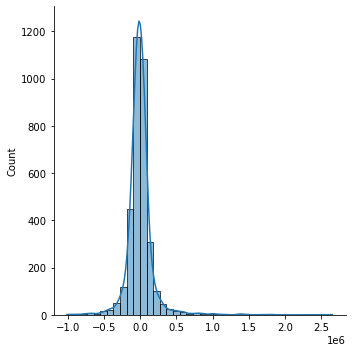

In [123]:
fig.suptitle("Residuals Distribution")

axes.set_xlabel("")

sns.displot(test_residuals, bins=40, kde=True)

In [25]:
first_lr = LinearRegression()

In [26]:
first_lr.fit(X, y)

LinearRegression()

In [27]:
first_lr.coef_

array([ 2.28858919e+04,  1.28065088e+03,  1.01948934e+04,  1.01332916e+05,
       -2.14987572e+04,  1.21162627e+04, -2.90542381e+03, -9.78469359e+01,
        9.17590378e+03,  2.15126256e+04, -7.34577861e+01,  2.02026324e+01,
        6.99369827e+03, -2.69074808e+04, -6.41288167e+04, -1.25030481e+05,
       -1.20027625e+04, -1.00558316e+04, -2.84113916e+04,  5.60789779e+04,
        2.39084231e+05,  5.12964420e+04, -5.98163034e+04,  1.49276899e+05,
       -5.57845835e+04, -1.00071220e+05, -3.31295115e+04,  1.96018327e+04,
        4.35096941e+04,  1.18655769e+05,  9.25009013e+03,  6.88718589e+04,
       -1.13940779e+05, -2.09584916e+04, -7.25863196e+04, -7.15473900e+04,
       -5.40051541e+04,  7.99464292e+04,  1.28042924e+04])

In [28]:
y_hat = first_lr.predict(X)

Text(0.5, 1.0, 'Surface master bedroom')

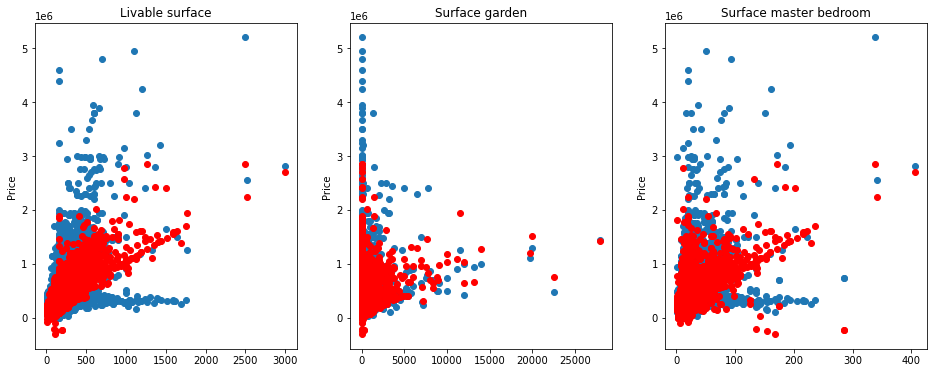

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].scatter(data["Livable surface"], data["Price"])
axes[0].scatter(data["Livable surface"], y_hat, color="red")
axes[0].set_ylabel("Price")
axes[0].set_title("Livable surface")

axes[1].scatter(data["Surface garden"], data["Price"])
axes[1].scatter(data["Surface garden"], y_hat, color="red")
axes[1].set_ylabel("Price")
axes[1].set_title("Surface garden")

axes[2].scatter(data["Surface master bedroom"], data["Price"])
axes[2].scatter(data["Surface master bedroom"], y_hat, color="red")
axes[2].set_ylabel("Price")
axes[2].set_title("Surface master bedroom")

### Standardised Data

In [30]:
X = np.array(df2.loc[:, "Number of bedrooms":])
y = np.array(df2["Price"])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
reg = LinearRegression().fit(X_train, y_train)

In [33]:
reg.score(X_train, y_train)

0.4831469982108453

In [34]:
y_pred = reg.predict(X_test)

In [35]:
print(r2_score(y_test, y_pred))

0.5260444984260508


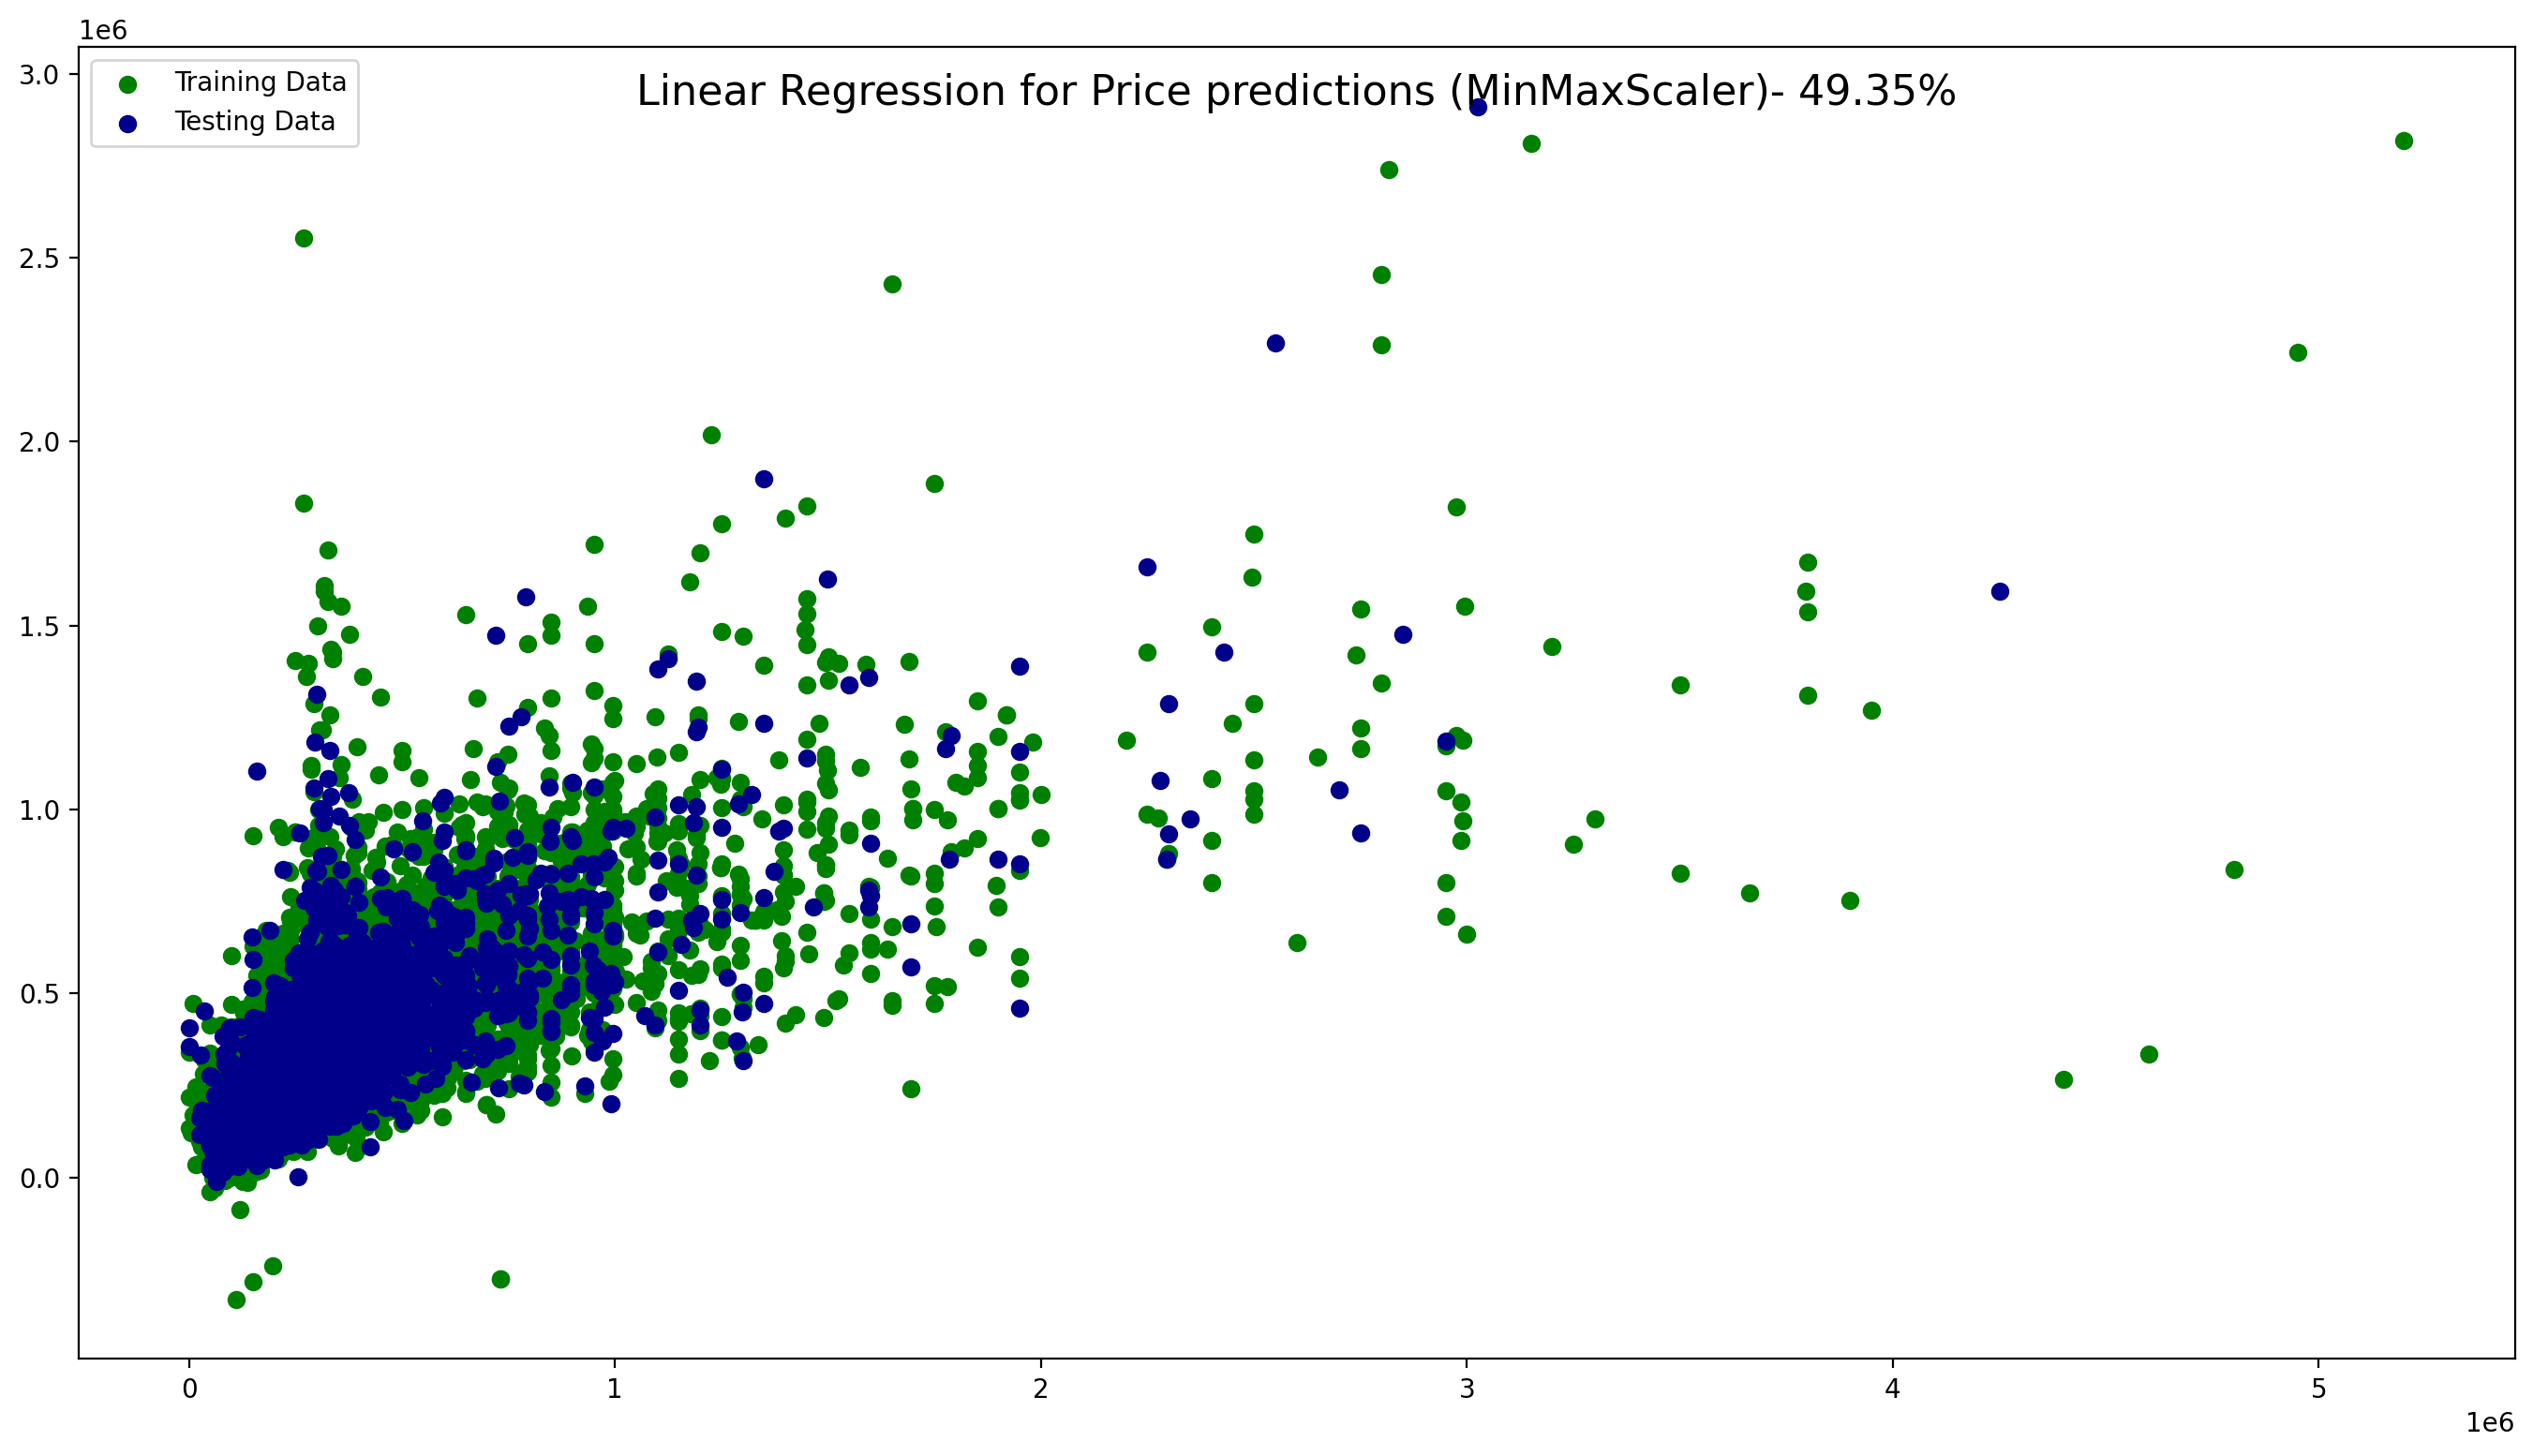

In [121]:
fig = plt.figure(figsize=(13,7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Linear Regression for Price predictions (MinMaxScaler)- 49.35%", fontsize=16)


plt.scatter(y_train, reg.predict(X_train), color="green", label="Training Data")
plt.scatter(y_test, y_pred,color="darkblue", label="Testing Data")
axes.legend()


plt.show()

---

In [37]:
X = np.array(df3.loc[:, "Number of bedrooms":])
y = np.array(df3["Price"])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
reg = LinearRegression().fit(X_train, y_train)

In [40]:
reg.score(X_train, y_train)

0.48968043420643703

In [41]:
y_pred = reg.predict(X_test)

In [42]:
print(r2_score(y_test, y_pred))

0.5261494959802406


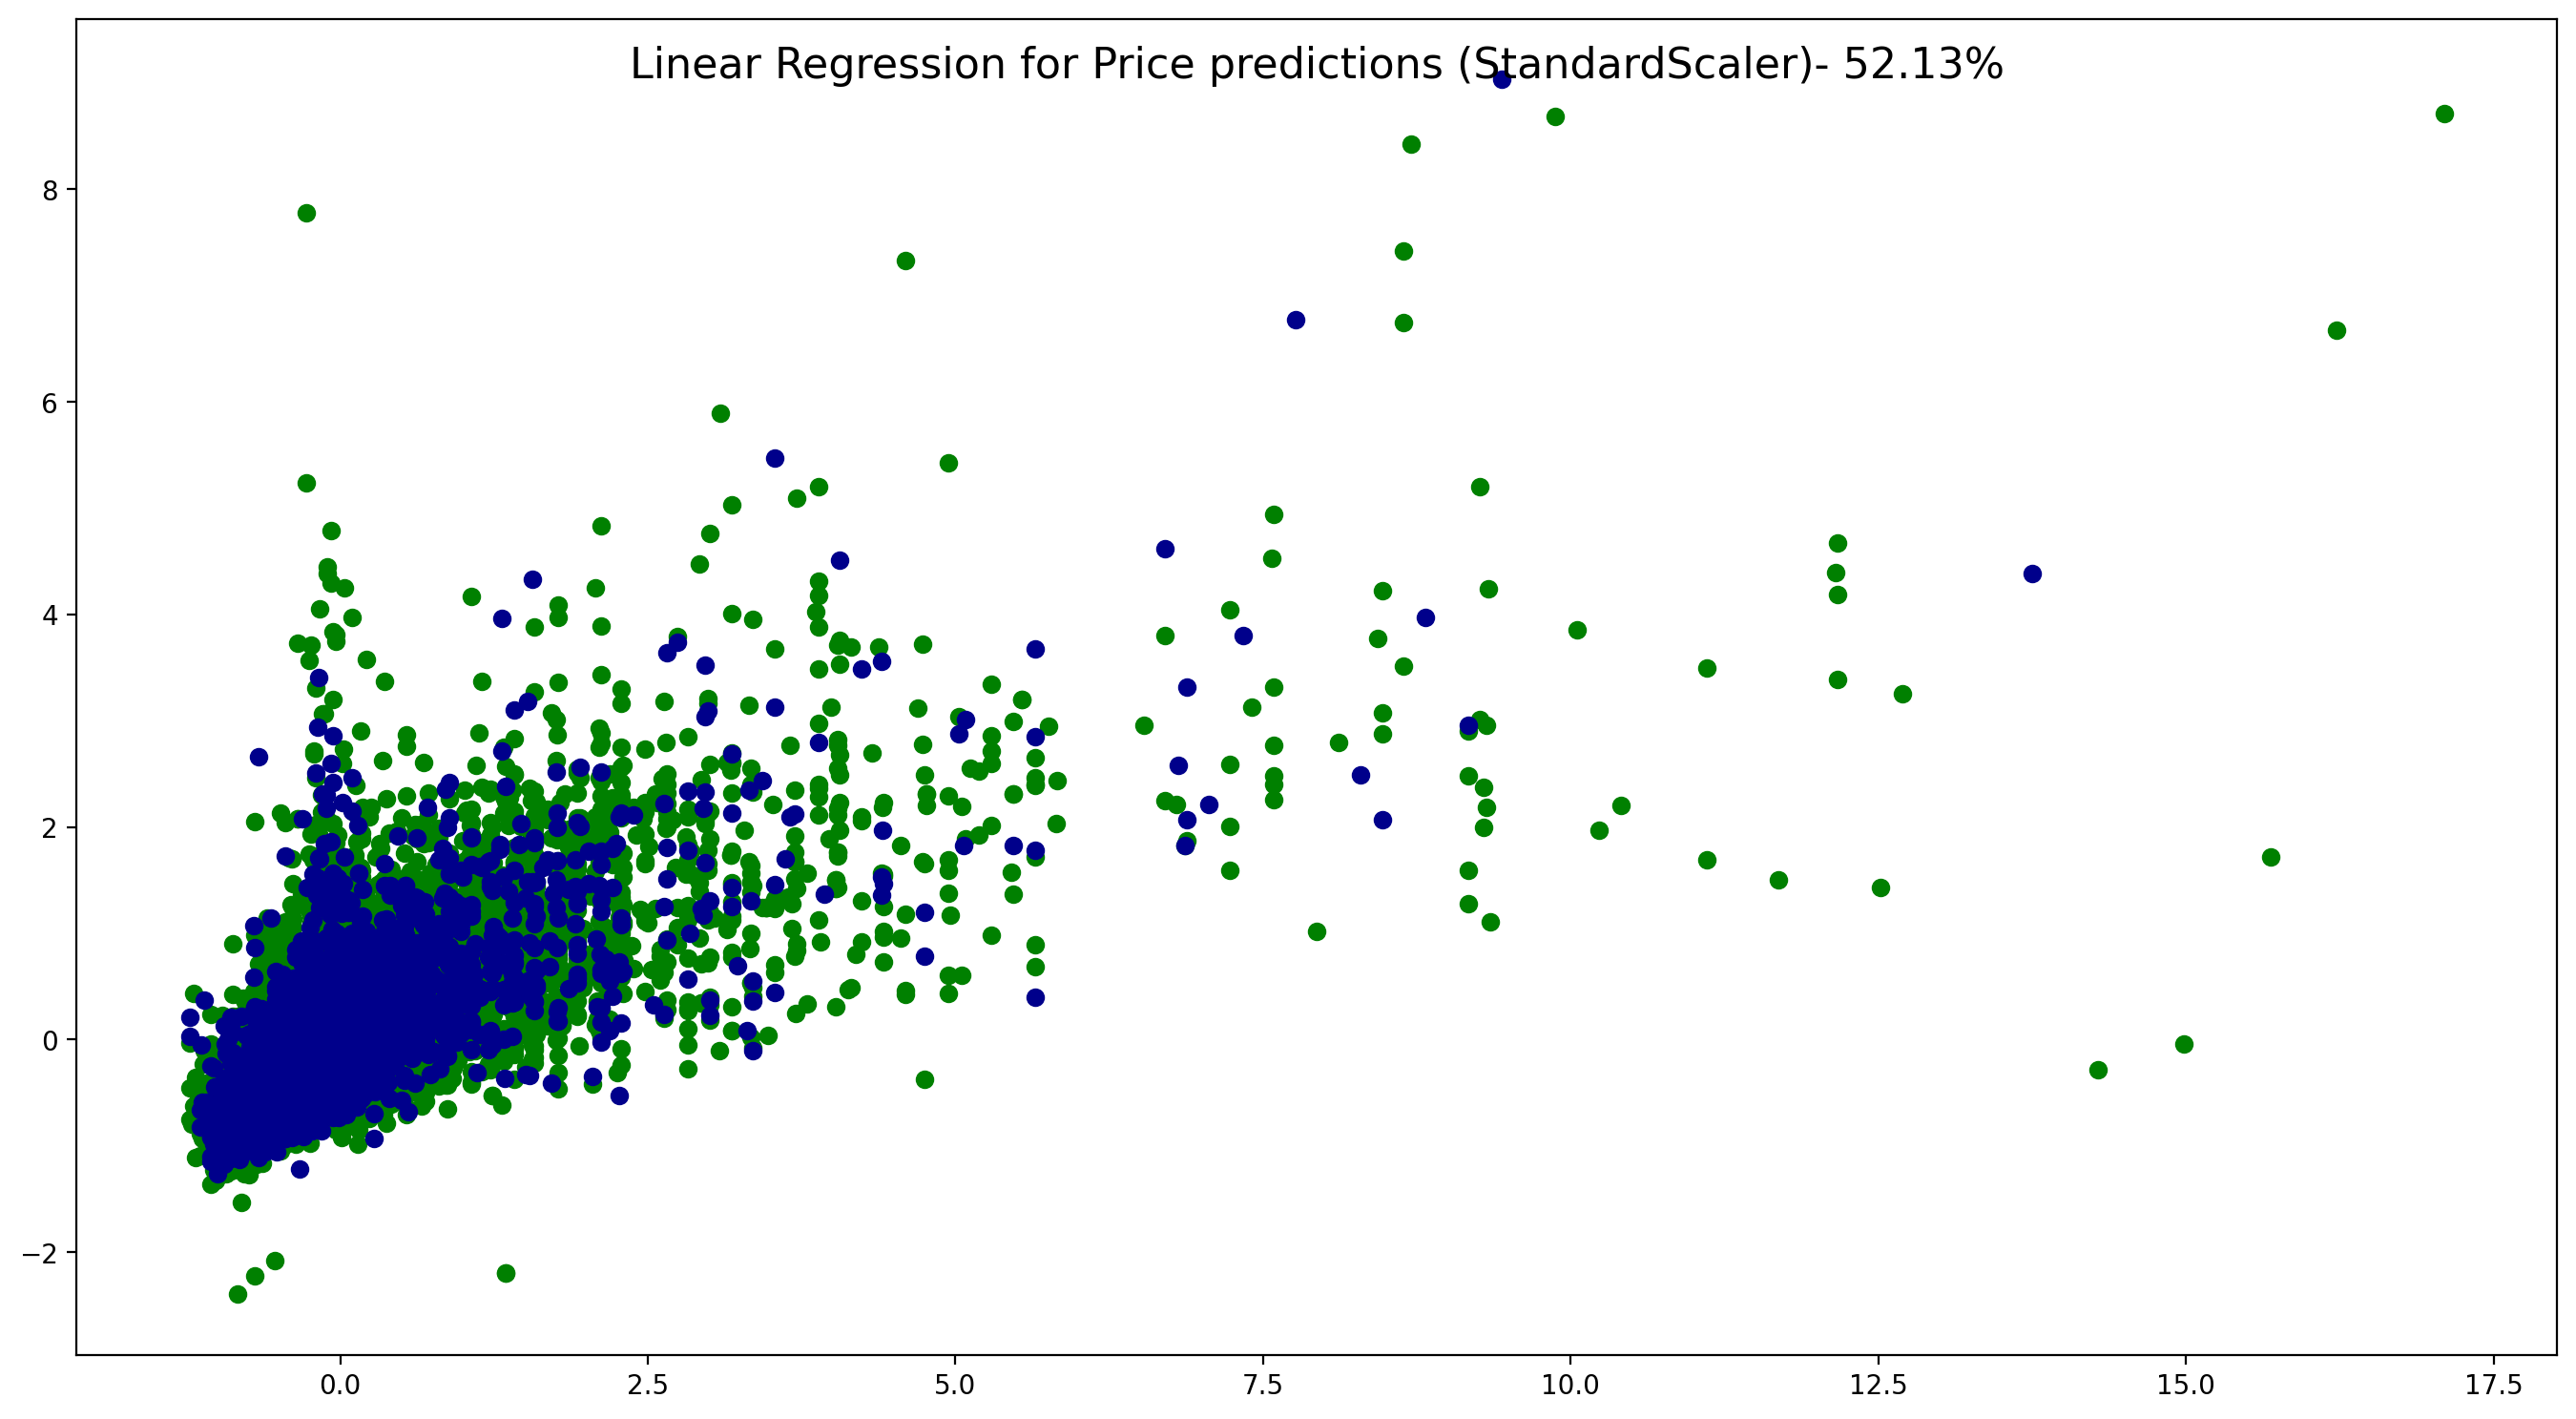

In [43]:
fig = plt.figure(figsize=(13,7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Linear Regression for Price predictions (StandardScaler)- 52.13%", fontsize=16)


plt.scatter(y_train, reg.predict(X_train), color="green", label="Training Data")
plt.scatter(y_test, y_pred,color="darkblue", label="Testing Data")


plt.show()

### Plots (As-is data)

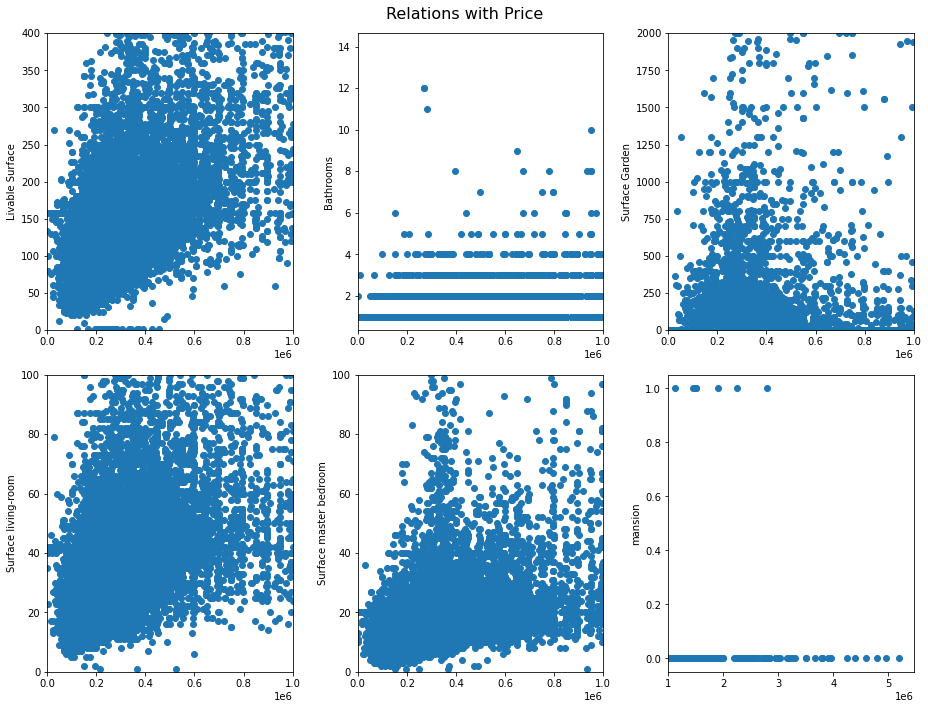

In [44]:
a = data["Price"]
b = data["Livable surface"]
c = data["Number of bathrooms"]
d = data["Surface garden"]
e = data["Surface of living-room"]
f = data["Surface master bedroom"]
g = data["mansion"]


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
fig.suptitle("Relations with Price", fontsize=16)


axes[0][0].scatter(a, b)
axes[0][0].set_ylabel("Livable Surface")
axes[0][0].set_xlim(0, 1000000)
axes[0][0].set_ylim(0, 400)


axes[0][1].scatter(a, c)
axes[0][1].set_ylabel("Bathrooms")
axes[0][1].set_xlim(0, 1000000)

axes[0][2].scatter(a, d)
axes[0][2].set_ylabel("Surface Garden")
axes[0][2].set_xlim(0, 1000000)
axes[0][2].set_ylim(0, 2000)

axes[1][0].scatter(a, e)
axes[1][0].set_ylabel("Surface living-room")
axes[1][0].set_xlim(0, 1000000)
axes[1][0].set_ylim(0, 100)

axes[1][1].scatter(a, f)
axes[1][1].set_ylabel("Surface master bedroom")
axes[1][1].set_xlim(0, 1000000)
axes[1][1].set_ylim(0, 100)

axes[1][2].scatter(a, g)
axes[1][2].set_ylabel("mansion")
axes[1][2].set_xlim(1000000,)


plt.tight_layout()
plt.show()

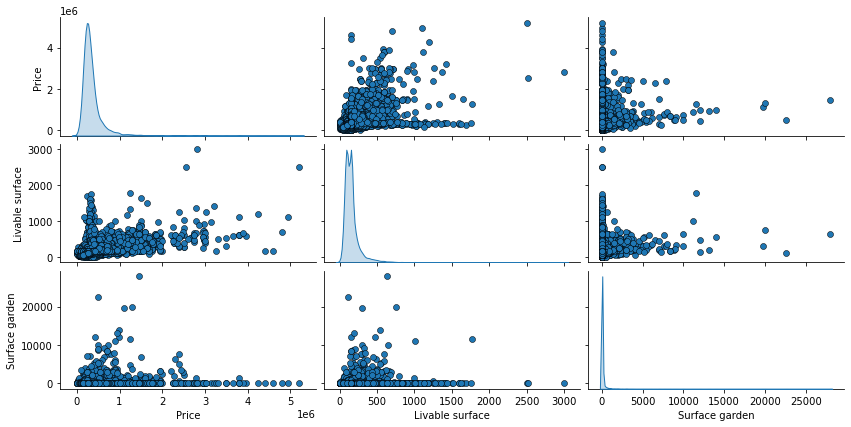

In [191]:
cols = ["Price", "Livable surface", "Surface garden"]

pp = sns.pairplot(
    data[cols], height=2, aspect=2, plot_kws=dict(edgecolor="k", linewidth=0.5),
    diag_kind="kde", diag_kws=dict(shade=True)
)

In [46]:
data.columns

Index(['Price', 'Number of bedrooms', 'Livable surface', 'Kitchen equipment',
       'Number of bathrooms', 'Balcony', 'State of the property',
       'Surface master bedroom', 'Surface of living-room', 'Cellar',
       'Number of facades', 'Surface terrace', 'Surface garden', 'Garage',
       'apartment', 'bungalow', 'chalet', 'cottage', 'duplex', 'ground-floor',
       'loft', 'mansion', 'master-house', 'mixed-building', 'penthouse',
       'residence', 'studio', 'triplex', 'villa', 'Antwerp Province',
       'Brussels-Capital Region', 'East Flanders Province',
       'Flemish Brabant Province', 'Hainaut Province', 'Limburg Province',
       'Liège Province', 'Luxembourg Province', 'Namur Province',
       'Walloon Brabant Province', 'West Flanders Province'],
      dtype='object')

### Plots (Standardized data)


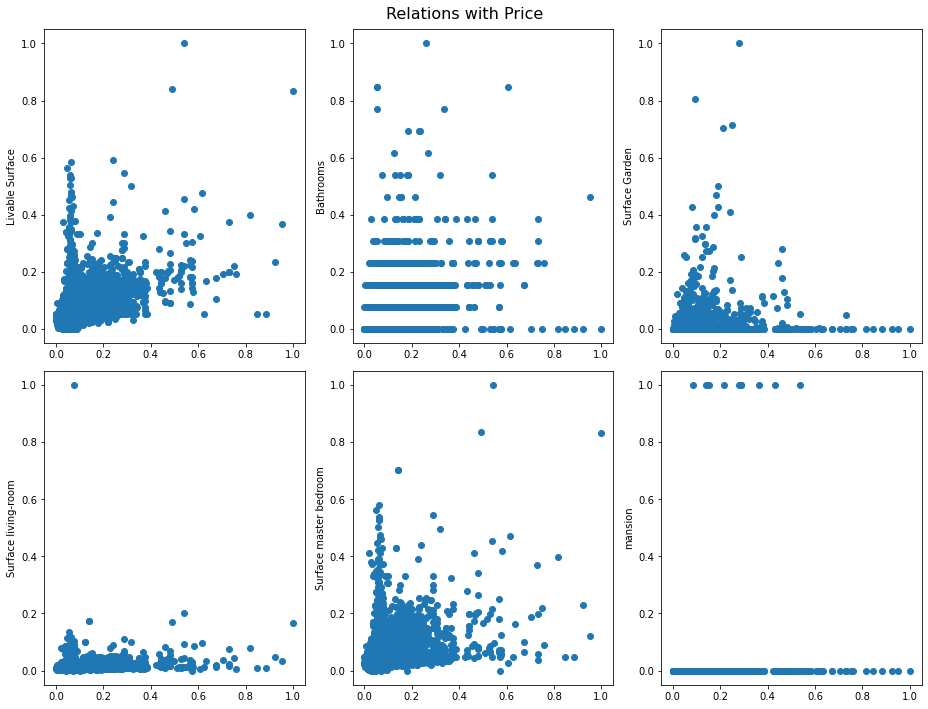

In [22]:
a = df2["Price"]
b = df2["Livable surface"]
c = df2["Number of bathrooms"]
d = df2["Surface garden"]
e = df2["Surface of living-room"]
f = df2["Surface master bedroom"]
g = df2["mansion"]


fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
fig.suptitle("Relations with Price", fontsize=16)


axes[0][0].scatter(a, b)
axes[0][0].set_ylabel("Livable Surface")

axes[0][1].scatter(a, c)
axes[0][1].set_ylabel("Bathrooms")

axes[0][2].scatter(a, d)
axes[0][2].set_ylabel("Surface Garden")

axes[1][0].scatter(a, e)
axes[1][0].set_ylabel("Surface living-room")

axes[1][1].scatter(a, f)
axes[1][1].set_ylabel("Surface master bedroom")

axes[1][2].scatter(a, g)
axes[1][2].set_ylabel("mansion")


plt.tight_layout()
plt.show()

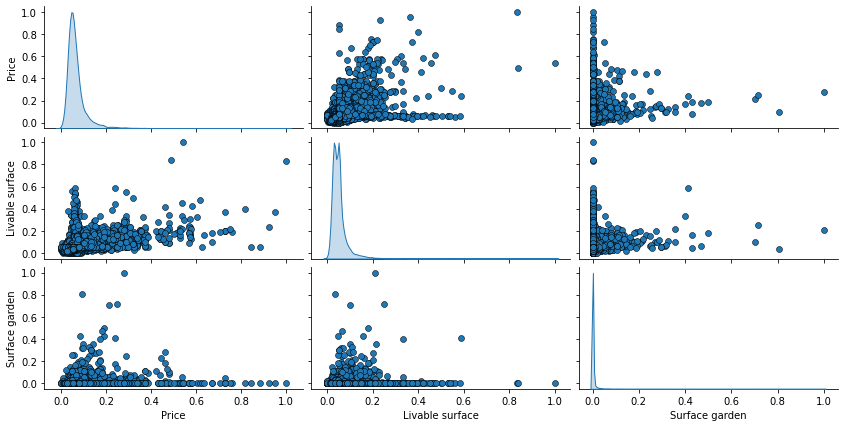

In [47]:
cols = ["Price", "Livable surface", "Surface garden"]

pp = sns.pairplot(
    df2[cols], height=2, aspect=2, plot_kws=dict(edgecolor="k", linewidth=0.5),
    diag_kind="kde", diag_kws=dict(shade=True)
)

## Polynomial Regressions
---

#### Without OHE regions and property types and degree 3 (13 features): 

In [182]:
X = np.array(data.loc[:, "Number of bedrooms": "Garage"])
y = np.array(data["Price"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [183]:
X_train.shape, y_train.shape

((13868, 13), (13868, 1))

In [184]:
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [185]:
poly_reg.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [186]:
poly_reg.score(X_train, y_train)

0.630178565616007

In [187]:
y_pred = poly_reg.predict(X_test)

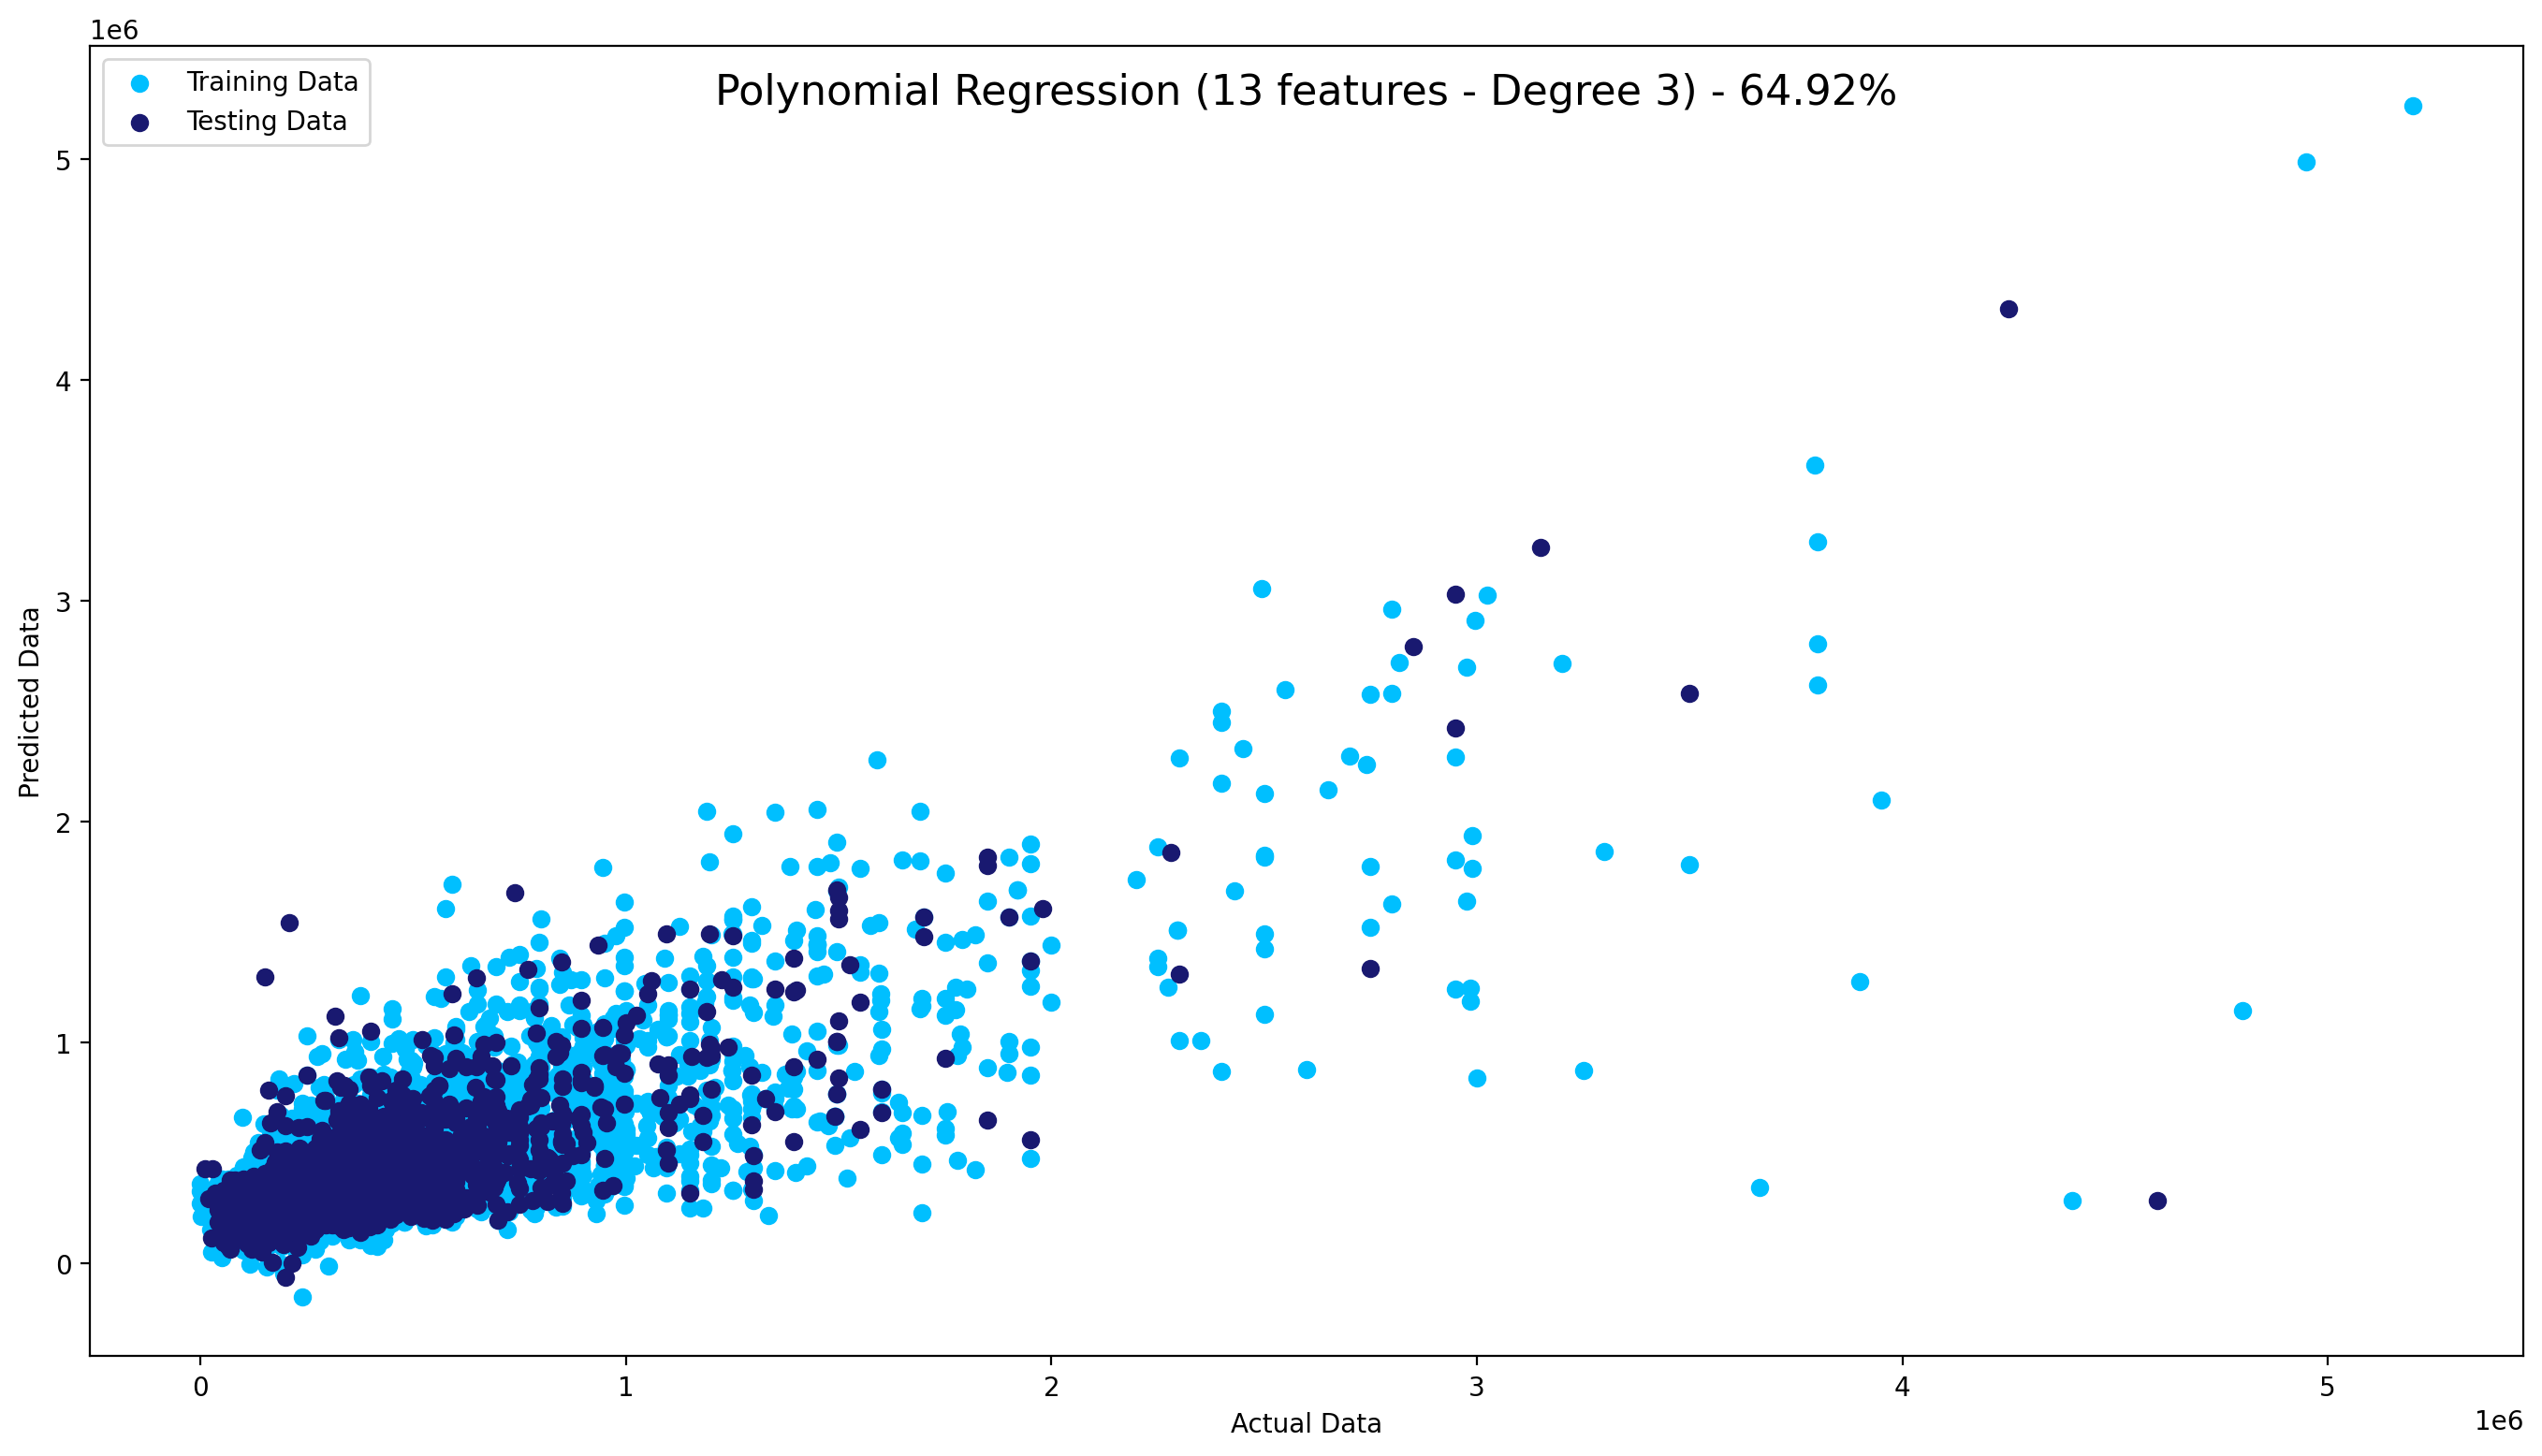

In [188]:
fig = plt.figure(figsize=(13, 7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Polynomial Regression (13 features - Degree 3) - 64.92%", fontsize=16)

plt.scatter(
    y_train, poly_reg.predict(X_train), color="deepskyblue", label="Training Data"
)
plt.scatter(y_test, y_pred, color="midnightblue", label="Testing Data")
axes.legend()
axes.set_xlabel("Actual Data")
axes.set_ylabel("Predicted Data")


plt.show()

#### Without OHE regions and degree 3 (28 features):

In [175]:
X = np.array(data.loc[:, "Number of bedrooms":"villa"])
y = np.array(data["Price"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [176]:
X_train.shape, y_train.shape

((13868, 28), (13868, 1))

In [177]:
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [178]:
poly_reg.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [179]:
poly_reg.score(X, y)

0.7079714161123929

In [180]:
y_pred = poly_reg.predict(X_test)

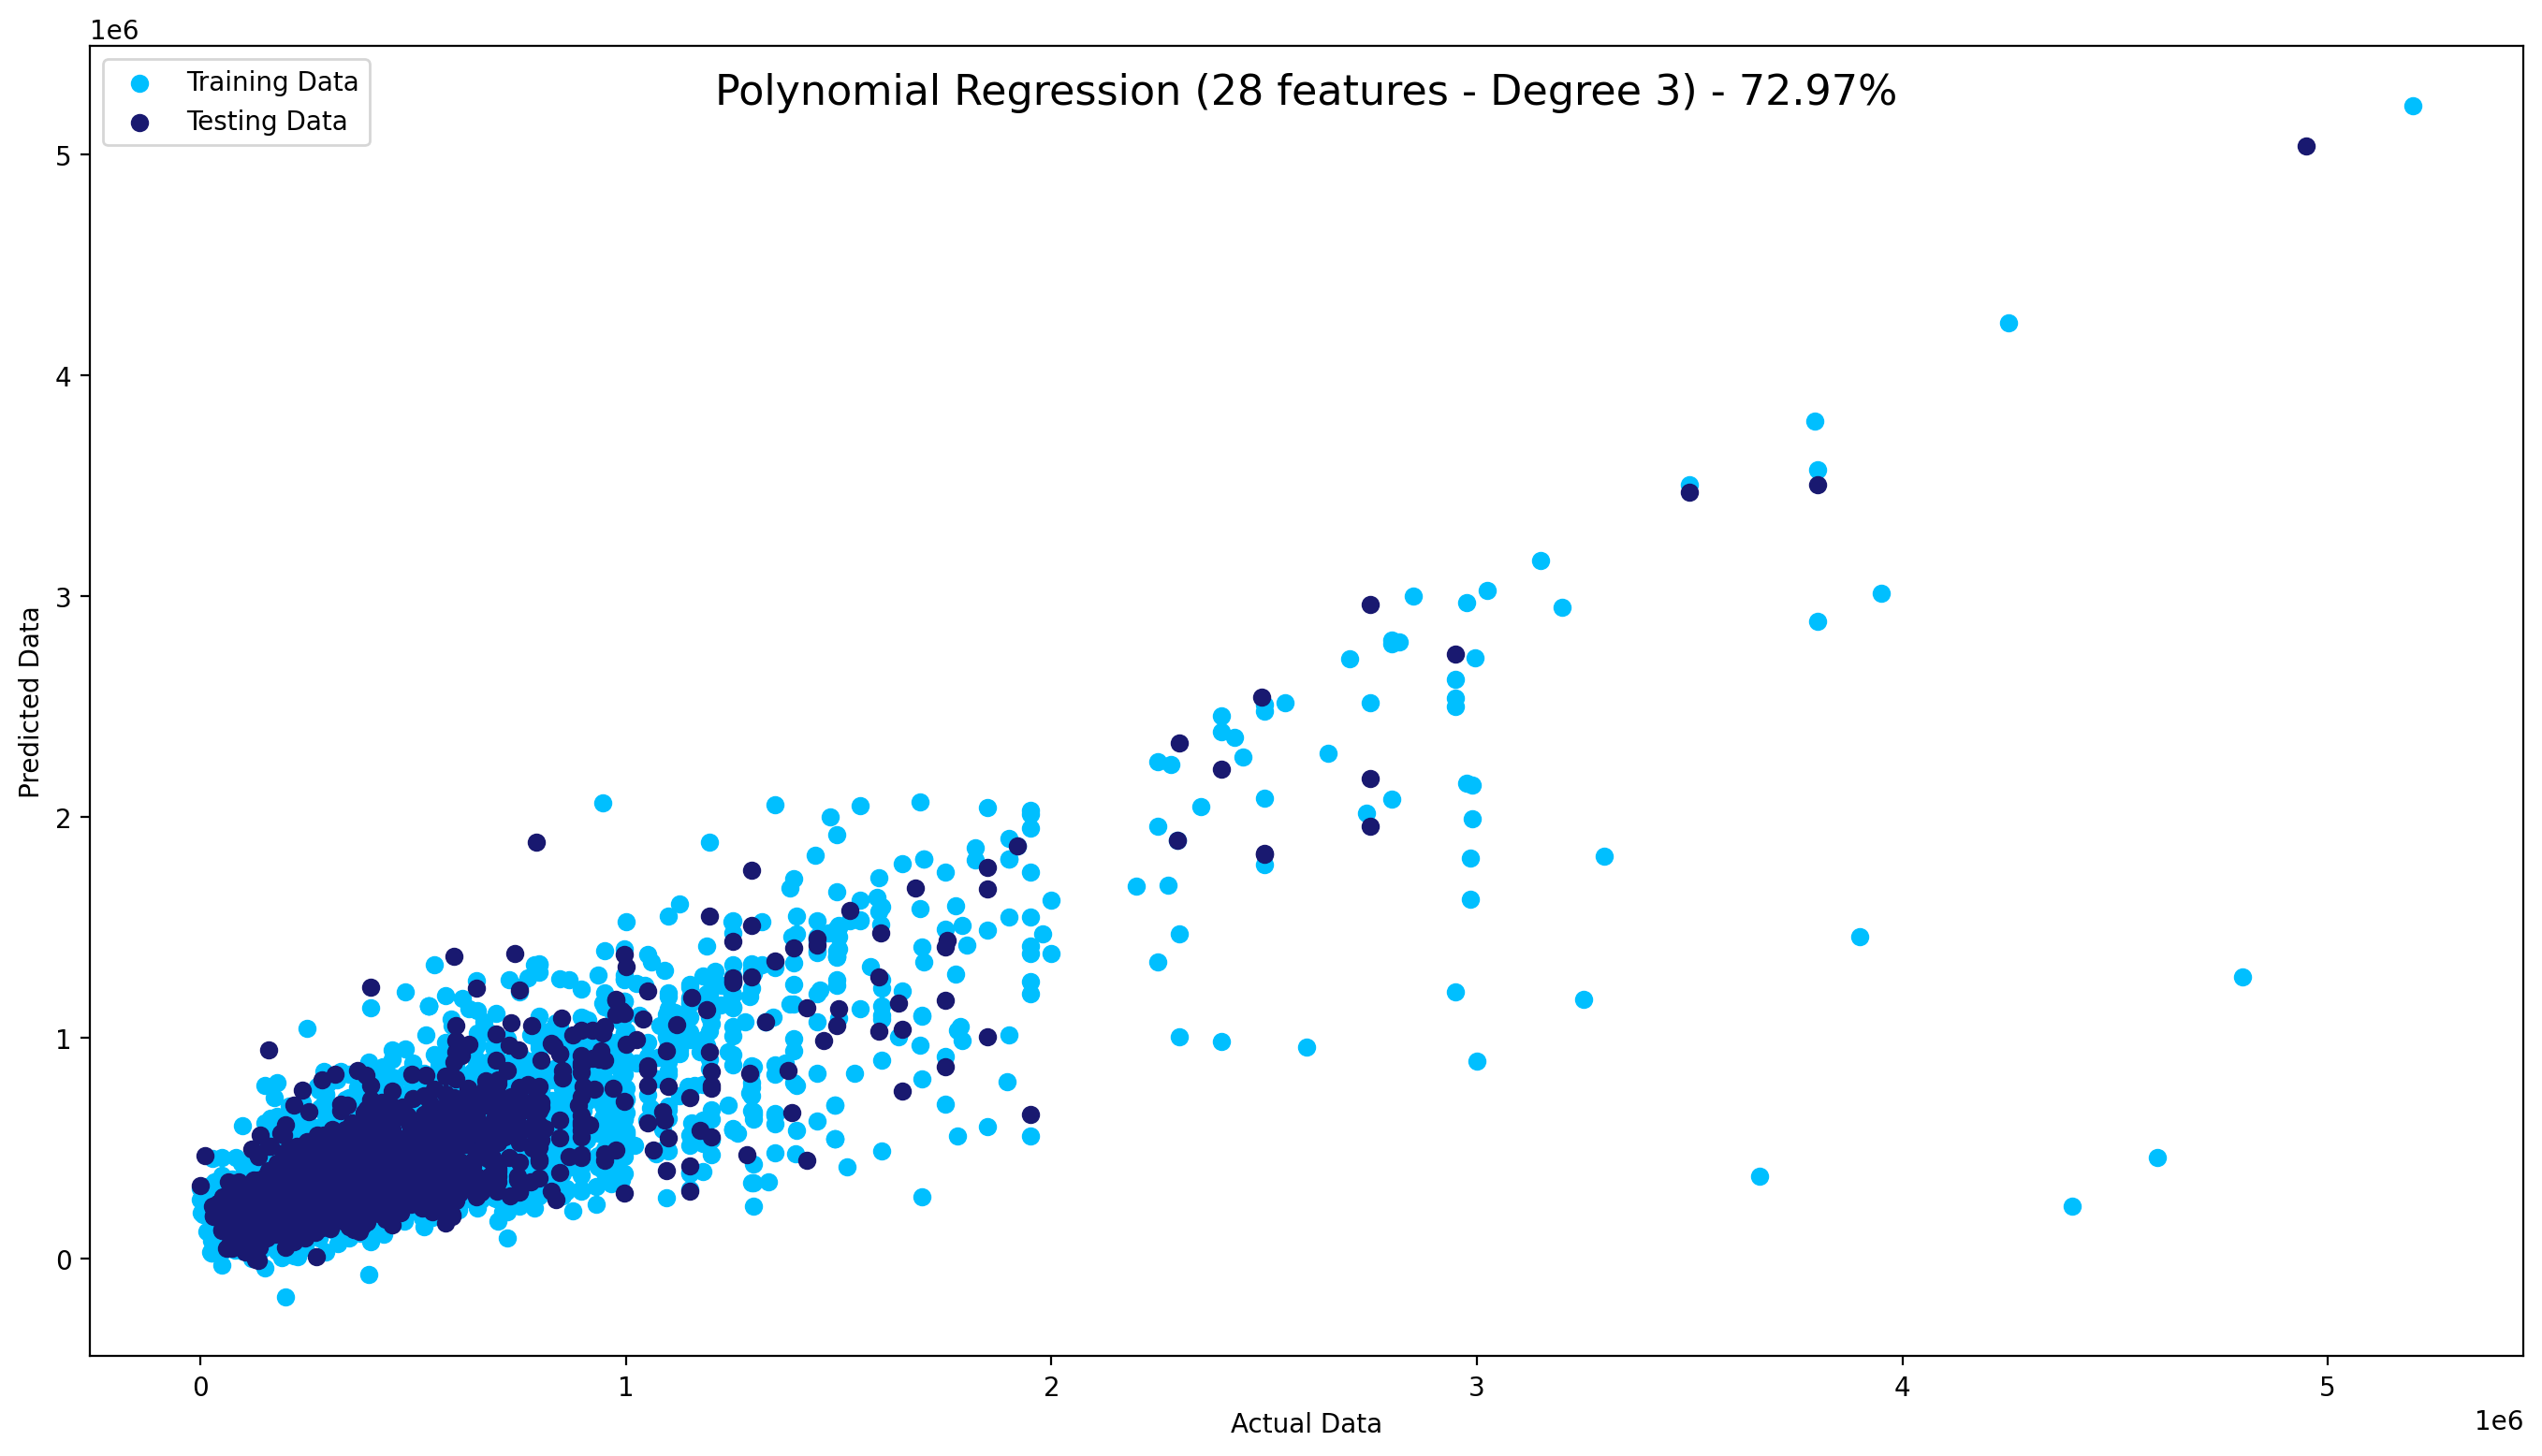

In [181]:
fig = plt.figure(figsize=(13, 7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Polynomial Regression (28 features - Degree 3) - 72.97%", fontsize=16)


plt.scatter(
    y_train, poly_reg.predict(X_train), color="deepskyblue", label="Training Data"
)
plt.scatter(y_test, y_pred, color="midnightblue", label="Testing Data")
axes.legend()
axes.set_xlabel("Actual Data")
axes.set_ylabel("Predicted Data")


plt.show()

---

#### With all 39 features and degree 3:

In [167]:
X = np.array(data.loc[:, "Number of bedrooms":])
y = np.array(data["Price"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [168]:
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [169]:
poly_reg.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [170]:
poly_reg.score(X, y)

0.8308270521285657

In [171]:
y_pred = poly_reg.predict(X_test)

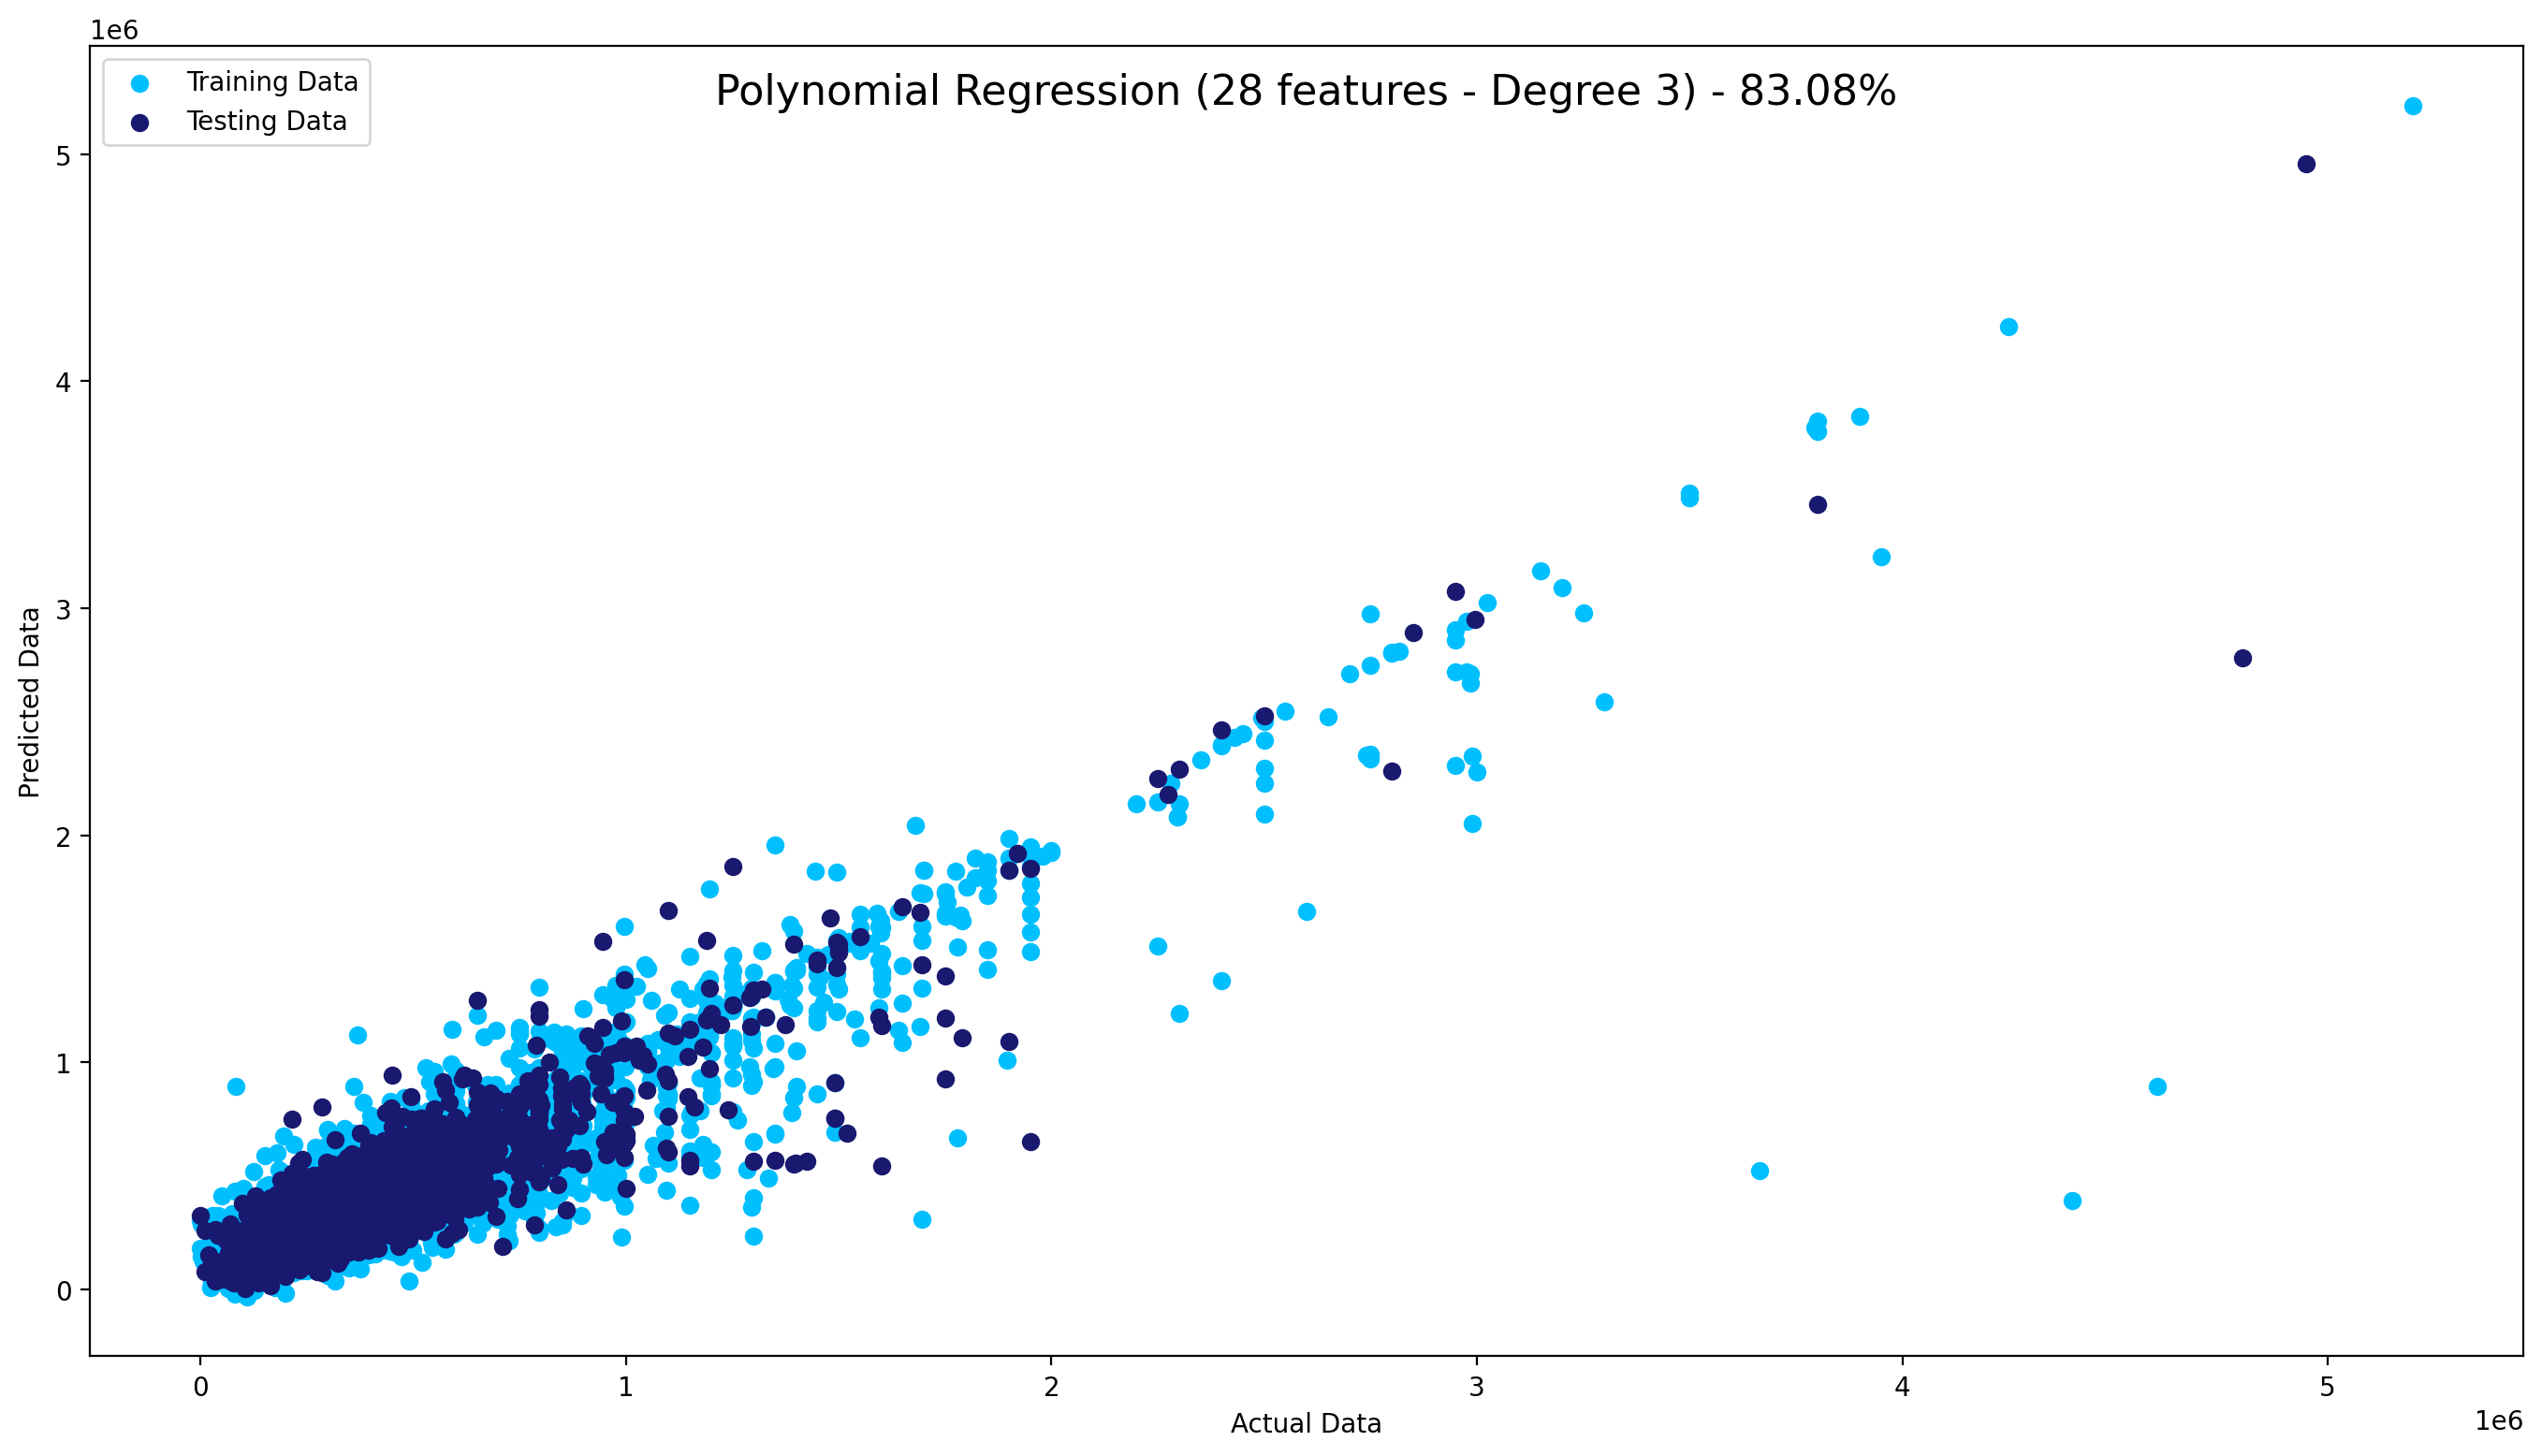

In [173]:
fig = plt.figure(figsize=(13, 7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Polynomial Regression (28 features - Degree 3) - 83.08%", fontsize=16)


plt.scatter(y_train, poly_reg.predict(X_train), color="deepskyblue", label="Training Data")
plt.scatter(y_test, y_pred, color="midnightblue", label="Testing Data")
axes.legend()
axes.set_xlabel("Actual Data")
axes.set_ylabel("Predicted Data")


plt.show()

---

### Some trials with normalized data

#### With all 39 features and degree 3:

In [280]:
X = np.array(df3.loc[:, "Number of bedrooms":])
y = np.array(df3["Price"]).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [281]:
poly_reg = make_pipeline(PolynomialFeatures(3), LinearRegression())

In [282]:
poly_reg.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])

In [283]:
poly_reg.score(X, y)

0.8307321909884967

In [284]:
y_pred = poly_reg.predict(X_test)

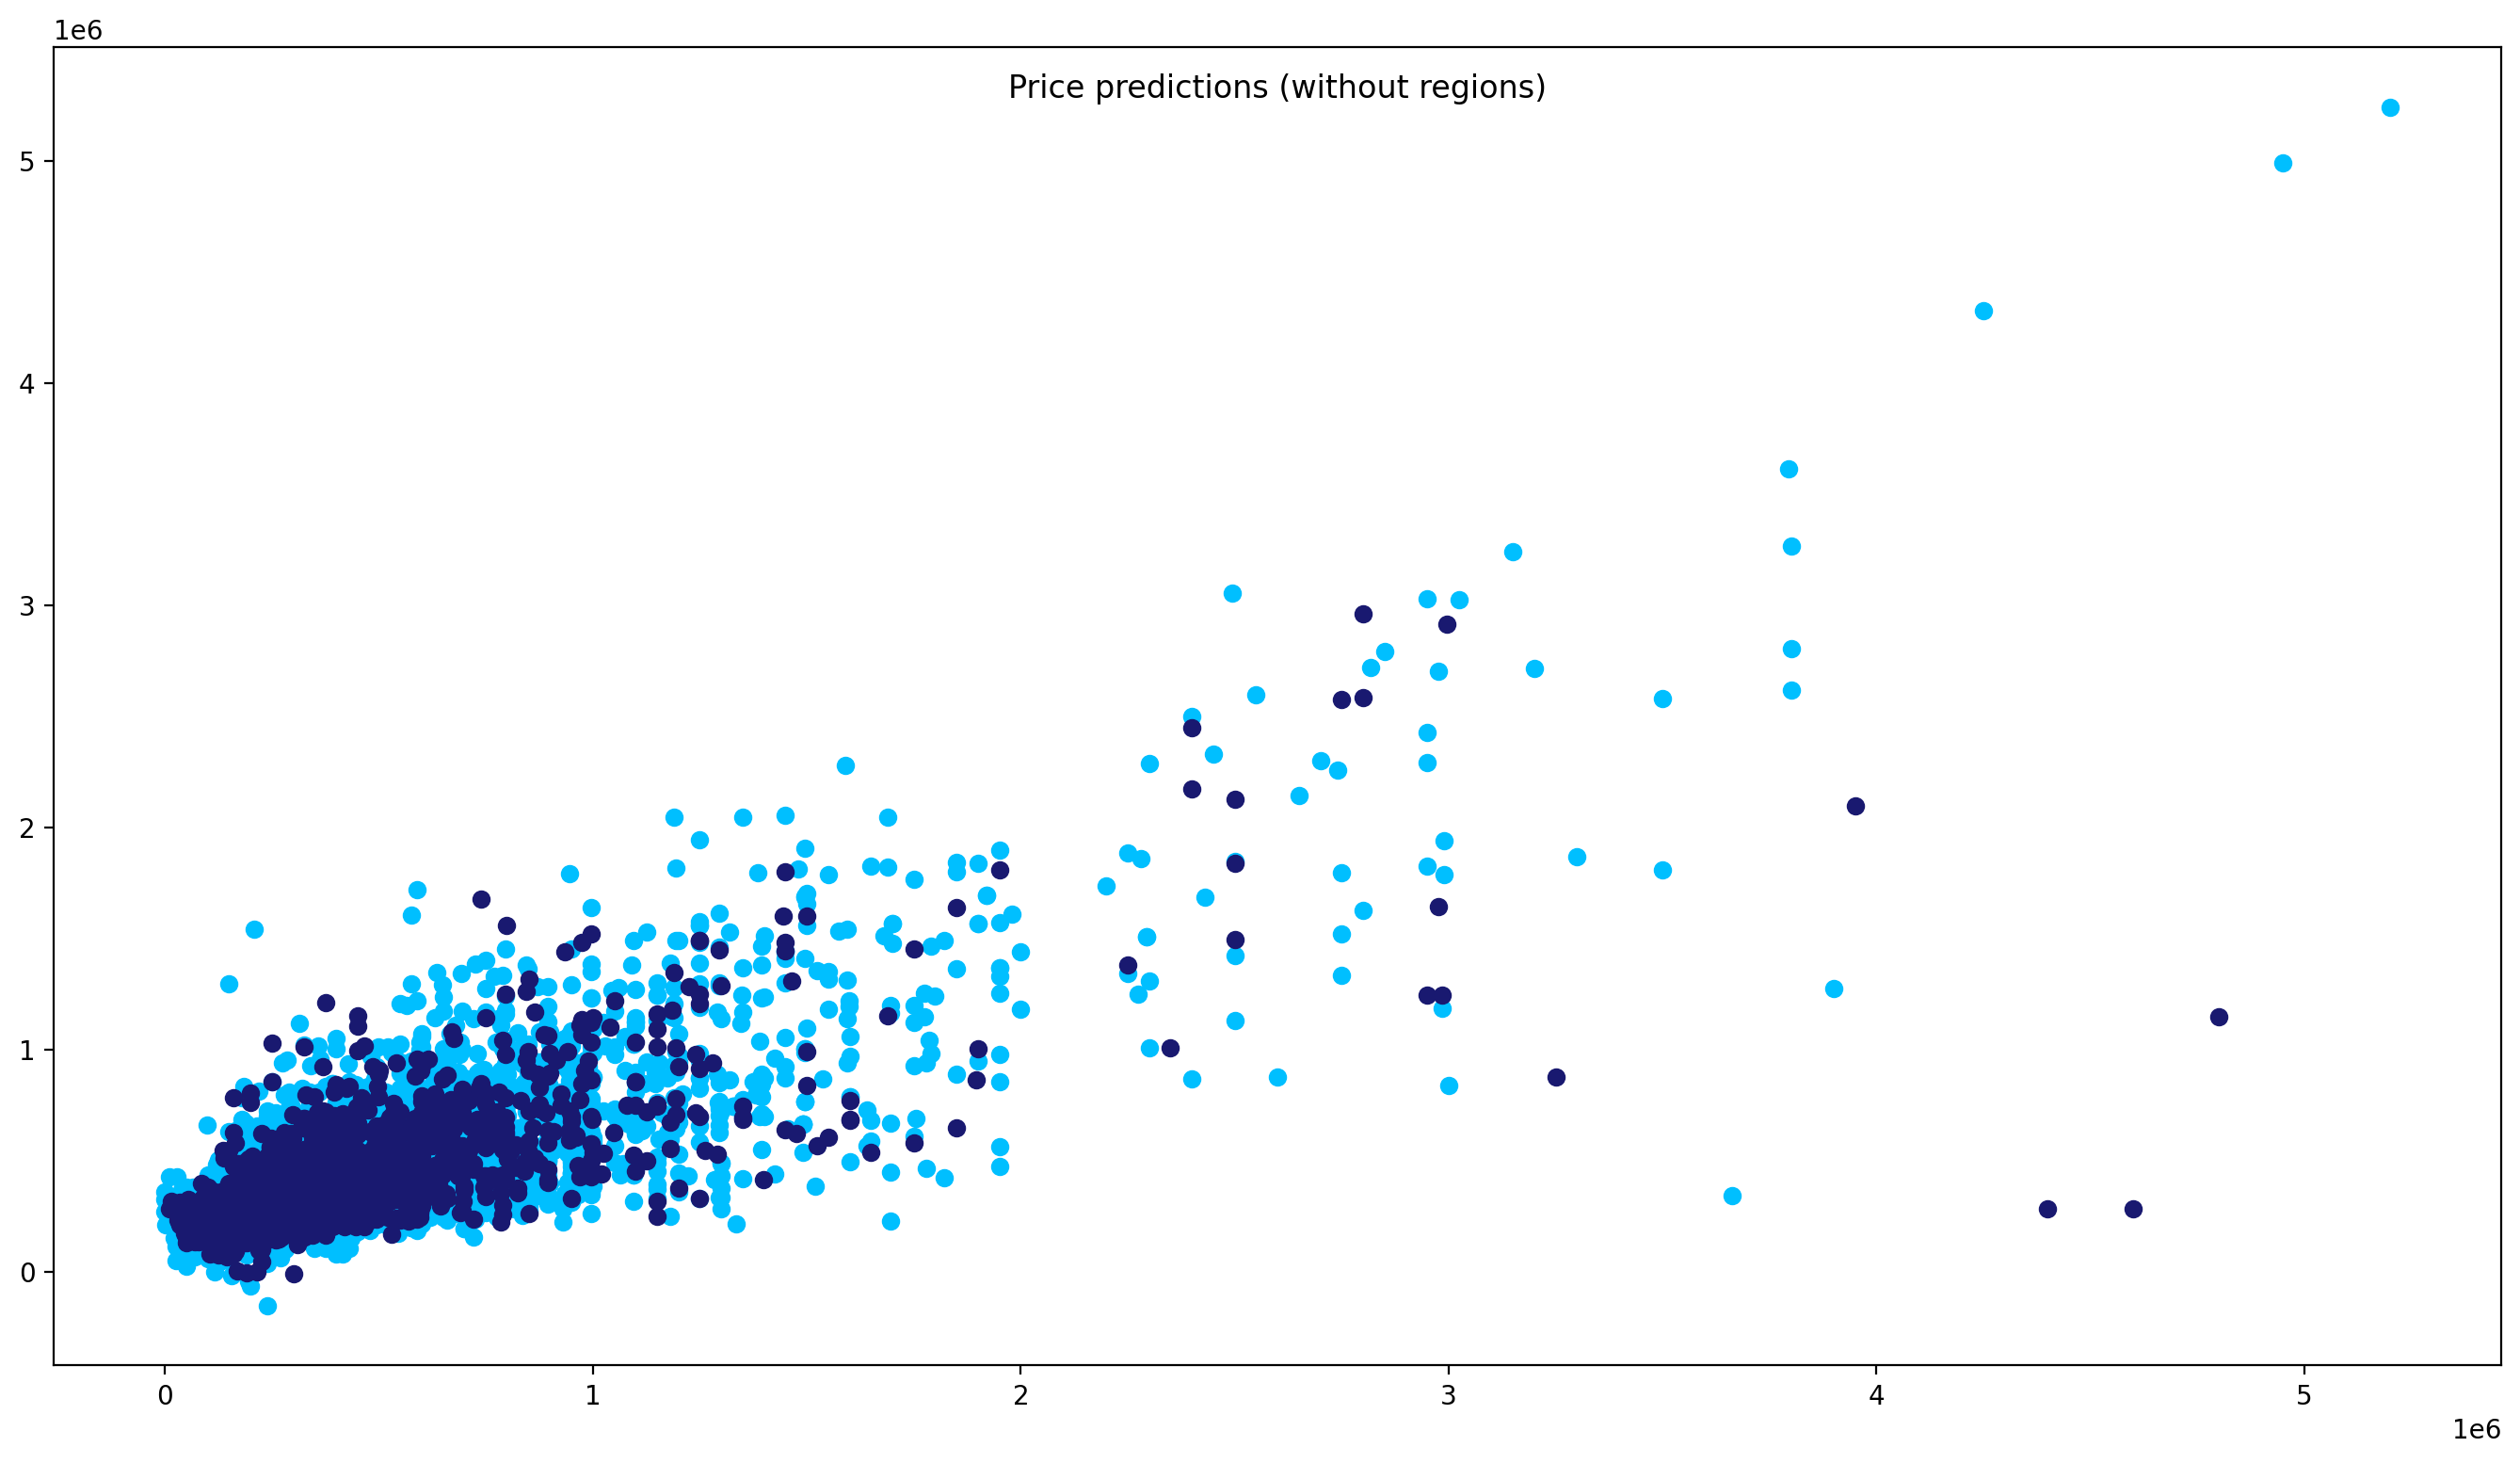

In [311]:
fig = plt.figure(figsize=(13,7), dpi=200)
axes = fig.add_axes([0, 0, 1, 1])
fig.suptitle("Price predictions (without regions)")


plt.scatter(y_train, poly_reg.predict(X_train), color="deepskyblue")
plt.scatter(y_test, y_pred,color="midnightblue")


plt.show()

---